<a href="https://colab.research.google.com/github/RashmiJK/PGP-AIML-ReneWind-NN/blob/main/renewind_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

## Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).

## Objective

“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description

The data provided is a transformed version of the original data which was collected using sensors.

- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.

Both the datasets consist of 40 predictor variables and 1 target variable.

# 1 - Installing and Importing the necessary libraries

The objective is to build classification neural netwrok model to predict the turbine failures.

**Instruction:** Restart the runtime after installing libraries to ensure correct package versions and ignore dependency warnings.

In [25]:
# Installing the libraries with the specified version
!pip install tensorflow==2.18.0 scikit-learn==1.3.2 matplotlib===3.8.3 seaborn==0.13.2 numpy==1.26.4 pandas==2.2.2 -q --user --no-warn-script-location --no-deps

In [1]:
# Libraries for data manipulation, analysis and scientific computing
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library for time related functions
import time

# For splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split
# Tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
# Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer

# Imports for evaluating the performance of machine learning models
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    classification_report
)

# Imports the tensorflow, keras and layers.
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend
from tensorflow import keras

# To suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# 2 - Import Dataset

In [3]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Import train and test set
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project-4/Train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project-4/Test.csv")

In [5]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed that influences operations that involve randomess like shuffling data, initializing weights or dropout layers
# 2) backend random seed that influences operations within keras itself
# 3) `python` random seed
keras.utils.set_random_seed(812)

# Call function so that TensorFlow attempts to make operations more deterministic
tf.config.experimental.enable_op_determinism()

# 3 - Data Overview

## 3.1 - Shape of the dataset

In [6]:
# Shape of the train data
df.shape

(20000, 41)

In [7]:
# Shape of the test data
df_test.shape

(5000, 41)

In [8]:
# Make a copy of train data and preserve the original
data = df.copy()

In [9]:
# Make a copy of test data and preserve the original
data_test = df_test.copy()

<span style="color: blue;"> **Observation**</span>
* The train set has 20000 rows and 41 columns
* The test set has 5000 rows and 41 columns

## 3.2 - View sample rows of the dataset

In [10]:
# View the first 5 rows of the data
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,-5.714719,0.735893,0.981251,1.417884,-3.375815,-3.047303,0.306194,2.914097,2.269979,4.394876,-2.388299,0.646388,-1.190508,3.132986,0.665277,-2.510846,-0.036744,0.726218,-3.982187,-1.072638,1.667098,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,1.914465,-0.951458,-1.255259,-2.706522,0.193223,-4.769379,-2.205319,0.907716,0.756894,-5.833678,-3.065122,1.596647,-1.757311,1.766444,-0.267098,3.625036,1.500346,-0.585712,0.783034,-0.201217,0.024883,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,-0.770673,1.106718,1.144261,0.943301,-3.163804,-4.247825,-4.038909,3.688534,3.311196,1.059002,-2.143026,1.650120,-1.660592,1.679910,-0.450782,-4.550695,3.738779,1.134404,-2.033531,0.840839,-1.600395,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,-3.053023,0.459719,2.704527,-0.636086,-0.453717,-3.174046,-3.404347,-1.281536,1.582104,-1.951778,-3.516555,-1.206011,-5.627854,-1.817653,2.124142,5.294642,4.748137,-2.308536,-3.962977,-6.028730,4.948770,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,1.998347,4.723757,0.709113,-1.989432,-2.632684,4.184447,2.245356,3.734452,-6.312766,-5.379918,-0.886667,2.061694,9.445586,4.489976,-3.945144,4.582065,-8.780422,-3.382967,5.106507,6.787513,2.044184,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0


In [11]:
# View random 5 rows of the data
data.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
12064,-0.764552,-4.941473,0.222119,-5.095314,-1.262965,-1.112442,-2.694133,0.192237,0.986656,-0.559456,-4.743450,4.087388,5.939446,1.494009,-7.019193,-5.897938,0.388389,7.368904,-3.119402,4.363991,-6.347991,4.909830,4.527317,-2.074595,1.592214,-3.220394,2.033211,-1.738571,-3.812661,-0.262135,-3.018894,-2.489202,-4.217574,-1.504447,-0.134008,6.486465,4.214021,-5.031245,2.967805,0.685425,0
1557,-4.089934,3.152208,3.423398,3.999387,2.250355,-2.849602,-0.595100,1.126280,-3.093891,1.350575,-3.070396,4.199762,-0.267420,-2.377282,-2.559785,-0.771482,0.640583,-0.806499,5.603059,-2.381178,-3.099341,-0.086305,0.882630,8.884040,-3.176450,5.453012,-6.105008,0.034906,-1.283661,1.437989,3.343975,8.946837,3.060782,0.563135,5.420494,0.689776,-2.158107,2.568949,0.539156,-4.008018,0
547,-0.029813,-3.022956,-0.265373,-4.457207,0.300206,-0.144165,-0.065150,2.777640,-2.104705,0.885664,-0.241385,2.069763,1.279603,1.945204,0.378906,3.566069,-1.767384,1.783763,-3.252419,-0.464406,1.130130,0.181083,2.219966,-0.920986,0.457871,-1.776223,2.003802,-1.741961,-0.360826,0.007331,3.710043,1.382491,-0.363915,-1.435063,-0.912192,4.796112,1.195906,-3.659618,0.664196,2.633353,0
13830,2.898566,-1.006482,-2.702558,-4.060640,-1.094510,0.348894,3.174205,4.285828,-1.695746,-2.051190,2.108290,4.125534,-3.177813,0.653460,6.999765,6.382671,3.220894,-0.714219,-2.327440,1.603711,5.611470,-0.624359,2.027053,-4.438849,2.635511,-5.090026,2.779883,0.940352,2.369909,-0.851931,-1.012343,-7.683395,-5.242774,1.483598,-5.274655,0.553090,3.235861,-1.345798,-0.920241,6.664309,1
19580,1.231375,-2.878551,5.776283,-3.307992,-1.662522,-1.616792,-1.254765,-0.436271,0.538919,2.077890,-2.120219,0.285741,5.414061,1.640368,-2.289312,-1.484388,-4.562397,0.093081,-0.771748,1.286346,-3.793965,-0.772187,-3.990718,-5.192889,2.357024,1.240530,5.766191,-3.332751,-2.845104,-3.297941,4.235937,-3.400158,-2.351994,0.767014,1.168552,7.102530,0.006747,-5.306493,2.990179,-0.850073,0


In [12]:
# View the first 5 rows of the test data
data_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613489,-3.819640,2.202302,1.300420,-1.184929,-4.495964,-1.835817,4.722989,1.206140,-0.341909,-5.122874,1.017021,4.818549,3.269001,-2.984330,1.387370,2.032002,-0.511587,-1.023069,7.338733,-2.242244,0.155489,2.053786,-2.772273,1.851369,-1.788696,-0.277282,-1.255143,-3.832886,-1.504542,1.586765,2.291204,-5.411388,0.870073,0.574479,4.157191,1.428093,-10.511342,0.454664,-1.448363,0
1,0.389608,-0.512341,0.527053,-2.576776,-1.016766,2.235112,-0.441301,-4.405744,-0.332869,1.966794,1.796544,0.410490,0.638328,-1.389600,-1.883410,-5.017922,-3.827238,2.418060,1.762285,-3.242297,-3.192960,1.857454,-1.707954,0.633444,-0.587898,0.083683,3.013935,-0.182309,0.223917,0.865228,-1.782158,-2.474936,2.493582,0.315165,2.059288,0.683859,-0.485452,5.128350,1.720744,-1.488235,0
2,-0.874861,-0.640632,4.084202,-1.590454,0.525855,-1.957592,-0.695367,1.347309,-1.732348,0.466500,-4.928214,3.565070,-0.449329,-0.656246,-0.166537,-1.630207,2.291865,2.396492,0.601278,1.793534,-2.120238,0.481968,-0.840707,1.790197,1.874395,0.363930,-0.169063,-0.483832,-2.118982,-2.156586,2.907291,-1.318888,-2.997464,0.459664,0.619774,5.631504,1.323512,-1.752154,1.808302,1.675748,0
3,0.238384,1.458607,4.014528,2.534478,1.196987,-3.117330,-0.924035,0.269493,1.322436,0.702345,-5.578345,-0.850662,2.590525,0.767418,-2.390809,-2.341961,0.571875,-0.933751,0.508677,1.210715,-3.259524,0.104587,-0.658875,1.498107,1.100305,4.142988,-0.248446,-1.136516,-5.355810,-4.545931,3.808667,3.517918,-3.074085,-0.284220,0.954576,3.029331,-1.367198,-3.412140,0.906000,-2.450889,0
4,5.828225,2.768260,-1.234530,2.809264,-1.641648,-1.406698,0.568643,0.965043,1.918379,-2.774855,-0.530016,1.374544,-0.650941,-1.679466,-0.379220,-4.443143,3.893857,-0.607640,2.944931,0.367233,-5.789081,4.597528,4.450264,3.224941,0.396701,0.247765,-2.362047,1.079378,-0.473076,2.242810,-3.591421,1.773841,-1.501573,-2.226702,4.776830,-6.559698,-0.805551,-0.276007,-3.858207,-0.537694,0


In [13]:
# View random 5 rows of the test data
data_test.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
4315,2.618494,-3.191676,3.031255,-2.368510,-1.997619,-2.164036,-1.111450,1.190680,1.642055,0.551021,-2.705755,0.285446,5.310006,2.445836,-2.394685,-1.414572,-1.898786,0.392164,-1.680833,3.271001,-3.911604,1.030938,-0.265800,-4.920196,2.666716,-0.754164,4.576995,-2.437166,-3.512911,-2.676940,1.894731,-2.209975,-4.324685,-0.094115,0.615038,4.793602,0.799068,-7.198435,1.321070,-0.378571,0
3559,0.695100,0.168081,1.208282,-6.640823,2.218828,3.085847,0.587179,-2.679194,-1.564612,1.682963,0.508370,-1.099111,-0.858966,0.132783,1.710629,0.427648,-4.251250,3.145762,-5.092608,-5.837187,2.127793,-0.847501,-2.487390,-1.083902,1.038873,1.979315,4.793393,-2.279777,-0.398800,-3.572594,5.485736,-2.713247,1.722762,-2.856871,-3.623083,5.843807,0.084745,2.721640,2.252480,4.447061,0
3464,-0.024189,-3.604224,3.840381,-3.143159,-0.915704,-1.275399,-1.726067,0.780507,-0.436314,1.987590,-1.688781,0.269244,4.547511,1.966785,-2.734846,-0.058644,-4.033663,1.031868,-1.536072,0.913761,-2.922876,-0.326258,-1.600565,-2.739692,1.028948,0.316272,3.389576,-3.042895,-1.845041,-0.945287,4.514637,0.663702,-0.173915,-0.614979,1.913042,6.293275,0.008954,-5.611372,1.991419,-0.608109,0
311,-4.688899,0.286059,2.591574,3.176721,1.182458,-2.073267,-0.708966,-0.780850,-2.334516,2.952707,-5.329062,2.983852,-2.293846,-1.266000,-0.897745,-3.206876,2.664876,1.029436,5.650534,1.638511,-1.052298,0.396357,-1.012577,6.792212,-0.376734,0.347995,-2.421598,2.610988,-3.749525,-2.107858,0.123124,2.609404,-2.112966,4.397915,1.408204,3.269961,-0.330060,3.940974,2.523738,-3.774929,0
3172,-0.328996,0.711194,4.350392,0.367634,0.233979,-0.243263,-1.533171,-3.485223,1.448103,0.724604,-3.733459,-1.711292,0.549223,-1.135692,-2.159418,-5.950062,0.153368,1.796897,0.677420,0.828173,-3.497138,0.127790,-4.355305,0.011858,1.651989,2.378928,1.041839,-0.423864,-2.374576,-3.098095,0.734892,-2.953439,-1.054328,0.207185,0.649782,2.853349,-0.299467,0.829404,2.068049,-0.970966,0


<span style="color: blue;"> **Observation**</span>
* All predictor variables (V1 to V40) are of floating-point data type.

## 3.3 - Check the data types of the columns

In [14]:
# View the data types of the columns in the train data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

In [15]:
# View the data types of the columns in the test data
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

Convert the 'Target' column to float for compatibility with neural network operations.

In [16]:
# Convert the 'Target' column to float in train set
data['Target'] = data['Target'].astype(float)

In [17]:
# Convert the 'Target' column to float in test set
data_test['Target'] = data_test['Target'].astype(float)

In [18]:
# Check the distinct categories in Target column of train data
print("Train set categories and value counts")
print("Number of unique categories:", data["Target"].nunique(),"\n")
print("Value counts for each category:\n", data["Target"].value_counts(), "\n")
print("Percentage of each category:\n", data["Target"].value_counts()/data["Target"].shape[0], "\n")

print("-" * 50)

# Check the distinct categories in Target column of test data
print("Test set categories and value counts")
print("Number of unique categories:", data_test["Target"].nunique(),"\n")
print("Value counts for each category:\n", data_test["Target"].value_counts(), "\n")
print("Percentage of each category:\n", data_test["Target"].value_counts()/data_test["Target"].shape[0], "\n")

Train set categories and value counts
Number of unique categories: 2 

Value counts for each category:
 Target
0.0    18890
1.0     1110
Name: count, dtype: int64 

Percentage of each category:
 Target
0.0    0.9445
1.0    0.0555
Name: count, dtype: float64 

--------------------------------------------------
Test set categories and value counts
Number of unique categories: 2 

Value counts for each category:
 Target
0.0    4718
1.0     282
Name: count, dtype: int64 

Percentage of each category:
 Target
0.0    0.9436
1.0    0.0564
Name: count, dtype: float64 



<span style="color: blue;"> **Observation**</span>
* As observed earlier, predictor variables (V1 to V40) are of floating-point data type.
* The Target column was of integer type which was converted to floating type.
* Missing values are present in columns V1 and V2 in both the train and test datasets.
* Percentage of each category **shows data imbalance**. Approximately 94.45% of the cases represent "No failure" (Target = 0), while about 5.5% represent "Failure" (Target = 1).

## 3.4 - Check for duplicate values

In [19]:
# Check for duplicates in the train data
data.duplicated().sum()

0

In [20]:
# Check for duplicates in the test data
data_test.duplicated().sum()

0

<span style="color: blue;"> **Observation**</span>
* No duplicates in train set
* No duplicates in test set

## 3.5 - Check for missing values

In [21]:
# Check for missing values in the train data
data.isnull().sum()

,0
V1,18
V2,18
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [23]:
# Check for missing values in the test data
data_test.isnull().sum()

,0
V1,5
V2,6
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


<span style="color: blue;"> **Observation**</span>
* As observed earlier, missing values are present in columns V1 and V2 in both the train and test datasets. This needs imputation.

## 3.6 - Describe dataset

In [24]:
# View the statistical summary of the numerical columns in the train data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,19982.0,-0.271996,3.441625,-11.876451,-2.737146,-0.747917,1.840112,15.493002
V2,19982.0,0.440430,3.150784,-12.319951,-1.640674,0.471536,2.543967,13.089269
V3,20000.0,2.484699,3.388963,-10.708139,0.206860,2.255786,4.566165,17.090919
V4,20000.0,-0.083152,3.431595,-15.082052,-2.347660,-0.135241,2.130615,13.236381
V5,20000.0,-0.053752,2.104801,-8.603361,-1.535607,-0.101952,1.340480,8.133797
V6,20000.0,-0.995443,2.040970,-10.227147,-2.347238,-1.000515,0.380330,6.975847
V7,20000.0,-0.879325,1.761626,-7.949681,-2.030926,-0.917179,0.223695,8.006091
V8,20000.0,-0.548195,3.295756,-15.657561,-2.642665,-0.389085,1.722965,11.679495
V9,20000.0,-0.016808,2.160568,-8.596313,-1.494973,-0.067597,1.409203,8.137580
V10,20000.0,-0.012998,2.193201,-9.853957,-1.411212,0.100973,1.477045,8.108472


In [25]:
# View the statistical summary of the numerical columns in the test data
data_test.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,4995.0,-0.277622,3.466280,-12.381696,-2.743691,-0.764767,1.831313,13.504352
V2,4994.0,0.397928,3.139562,-10.716179,-1.649211,0.427369,2.444486,14.079073
V3,5000.0,2.551787,3.326607,-9.237940,0.314931,2.260428,4.587000,15.314503
V4,5000.0,-0.048943,3.413937,-14.682446,-2.292694,-0.145753,2.166468,12.140157
V5,5000.0,-0.080120,2.110870,-7.711569,-1.615238,-0.131890,1.341197,7.672835
V6,5000.0,-1.042138,2.005444,-8.924196,-2.368853,-1.048571,0.307555,5.067685
V7,5000.0,-0.907922,1.769017,-8.124230,-2.054259,-0.939695,0.212228,7.616182
V8,5000.0,-0.574592,3.331911,-12.252731,-2.642088,-0.357943,1.712896,10.414722
V9,5000.0,0.030121,2.174139,-6.785495,-1.455712,-0.079891,1.449548,8.850720
V10,5000.0,0.018524,2.145437,-8.170956,-1.353320,0.166292,1.511248,6.598728


# 4 - Exploratory Data Analysis (EDA)

## 4.1 - Define utility functions for Univariate Analysis
Since all the columns are numerical, a utility function is built using histogram and box plots.

In [40]:
# Function to plot histogram and box plot

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None, title=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show density curve (default False)
    bins: number of bins for histogram (default None)
    title: title of plot (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # Add title to the figure if provided
    if title:
        f2.suptitle(title, y=0.9) # Use suptitle for a title over all subplots

    # creating the 2 subplots
    # boxplot will be created and a triangle will indicate the mean value of the column
    sns.boxplot(
        data= data, x= feature, ax= ax_box2, showmeans=True, color="turquoise"
    )

    # For histogram
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )

    # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--", label = 'Mean'
    )
    # Add median to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="orange", linestyle="-", label = 'Median'
    )
    ax_hist2.legend()


## 4.2 - Univariate analysis

### 4.2.1 - Variables V1 to V40

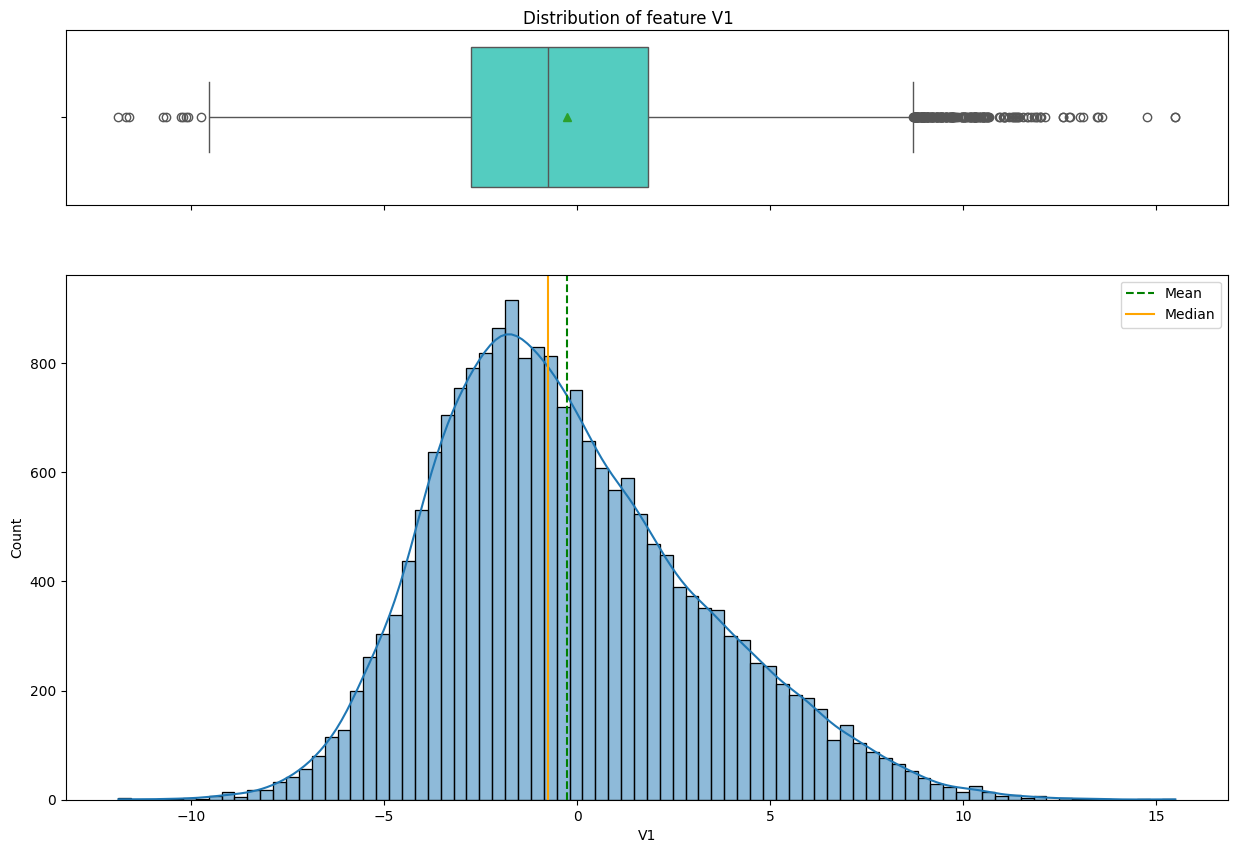

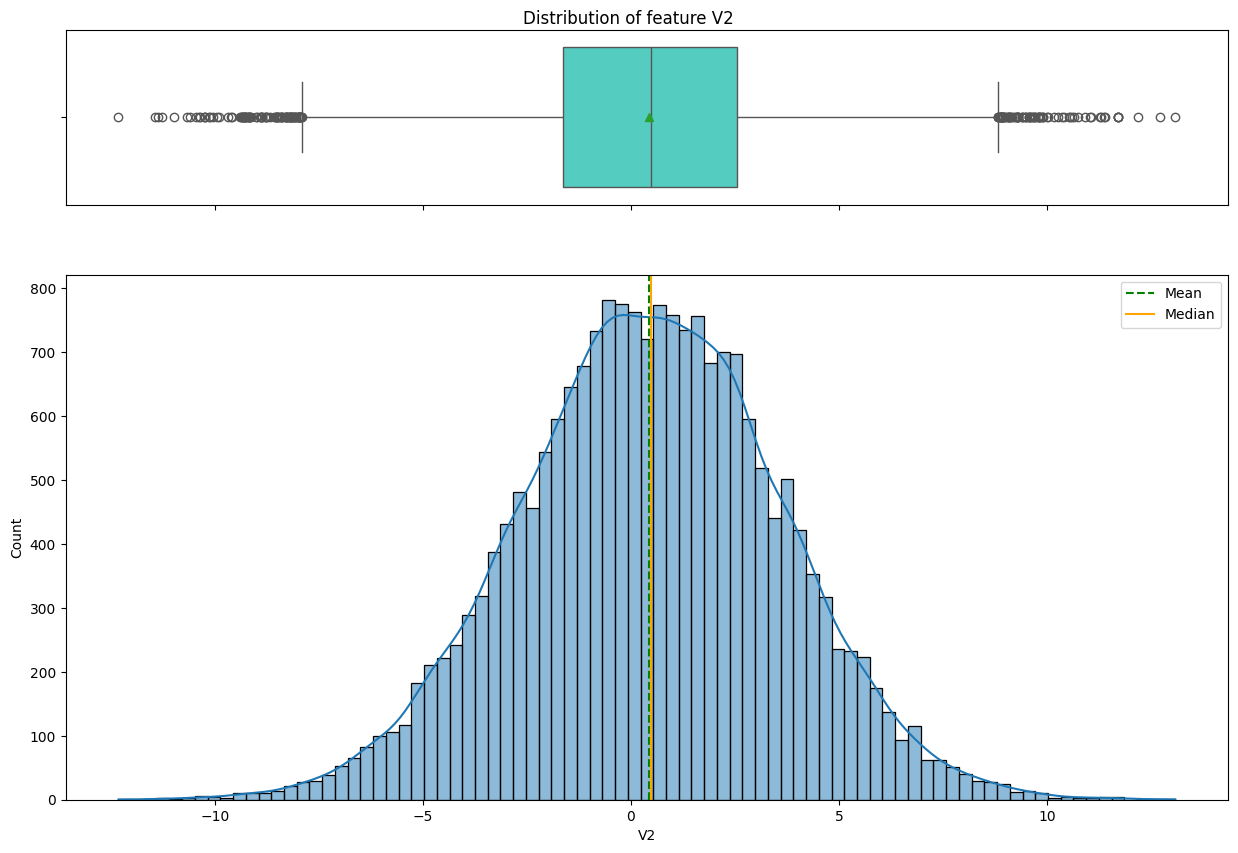

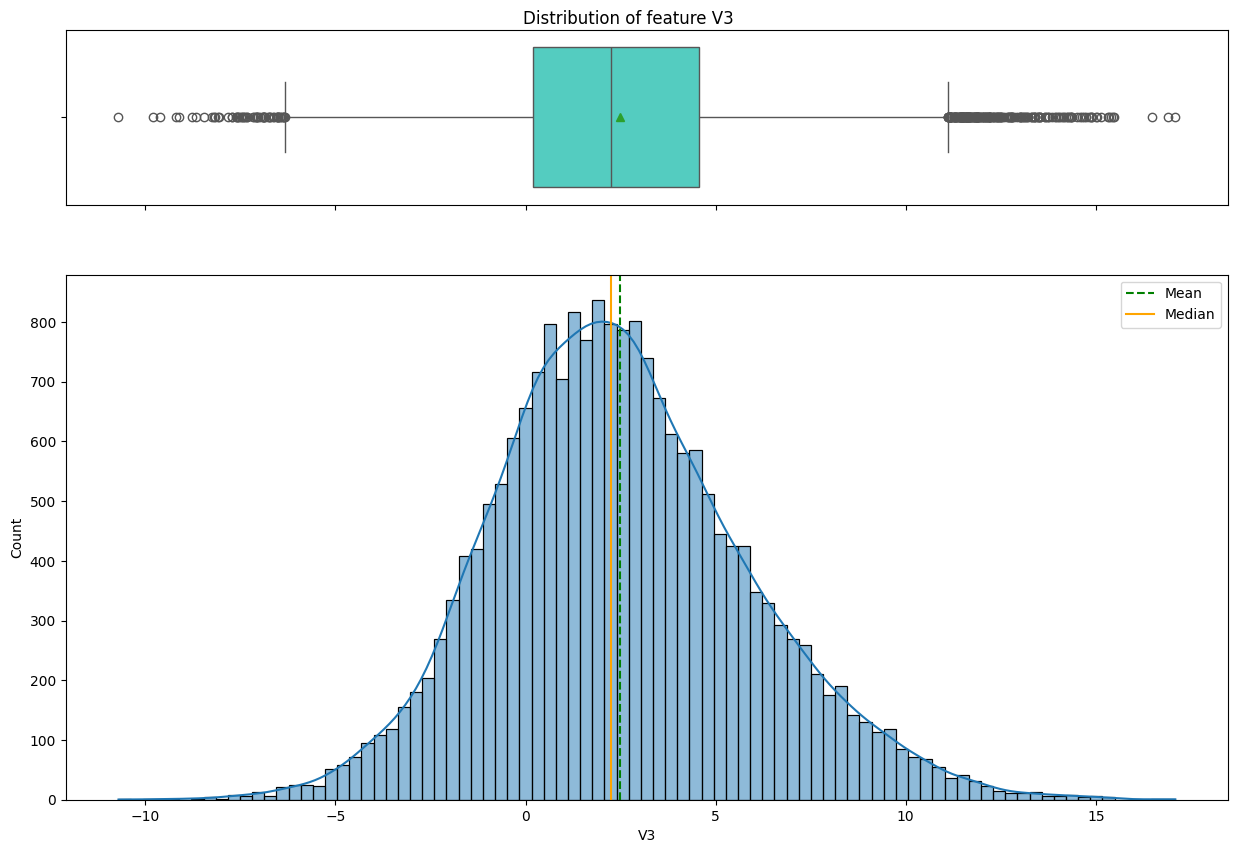

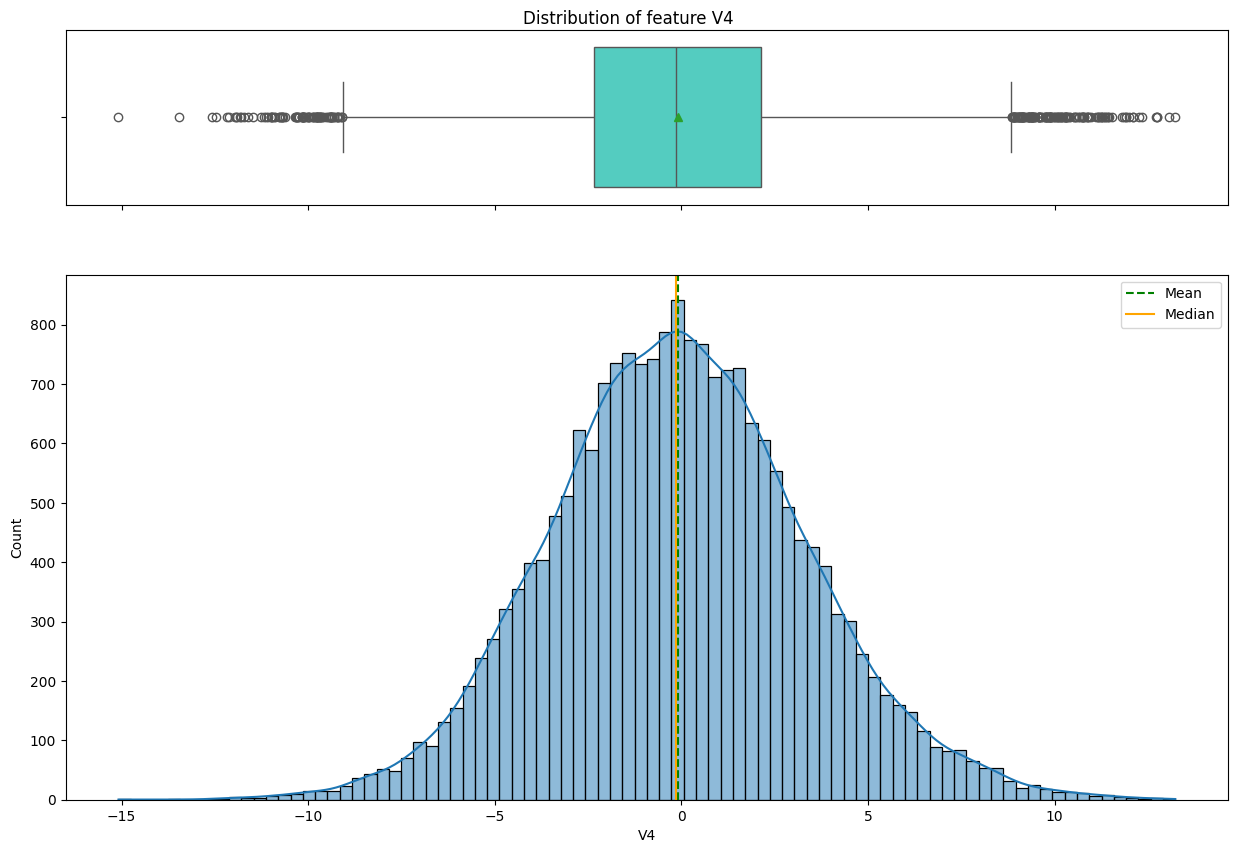

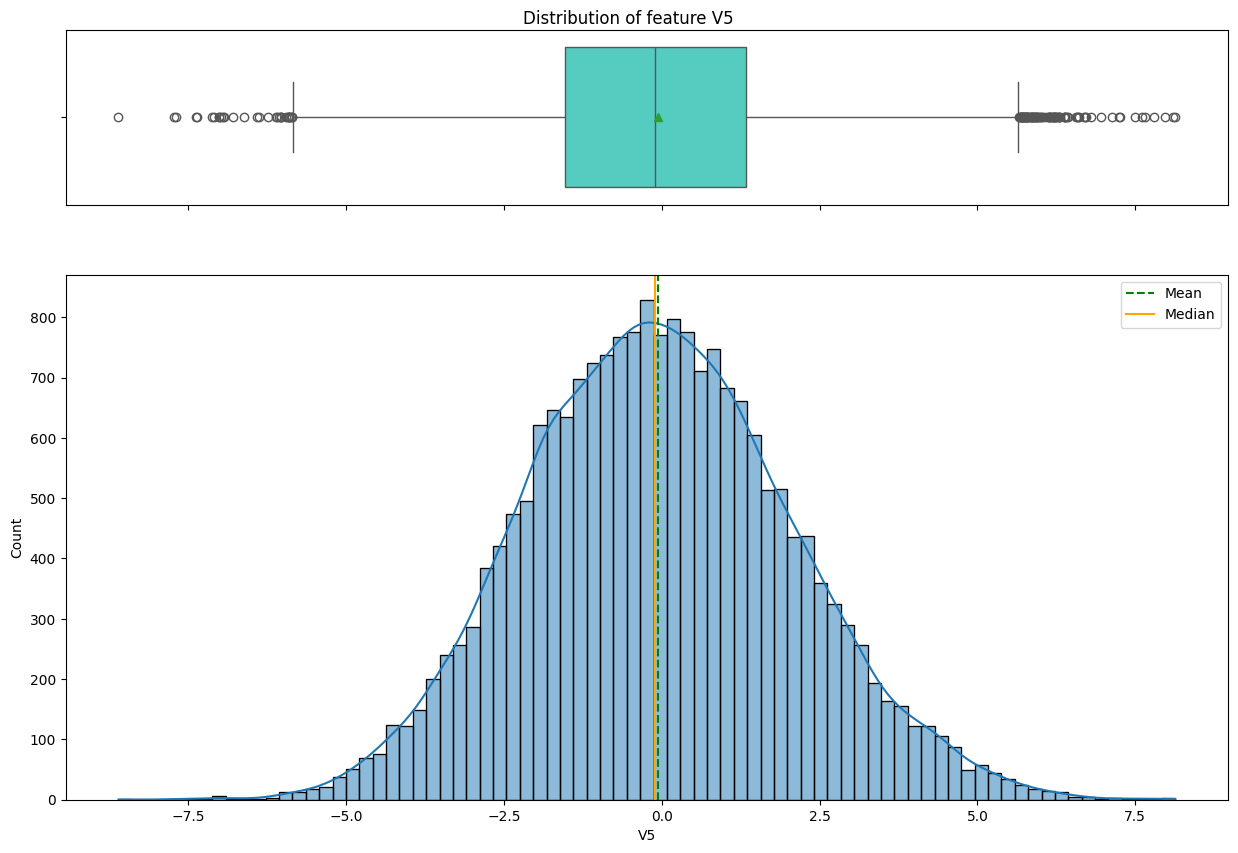

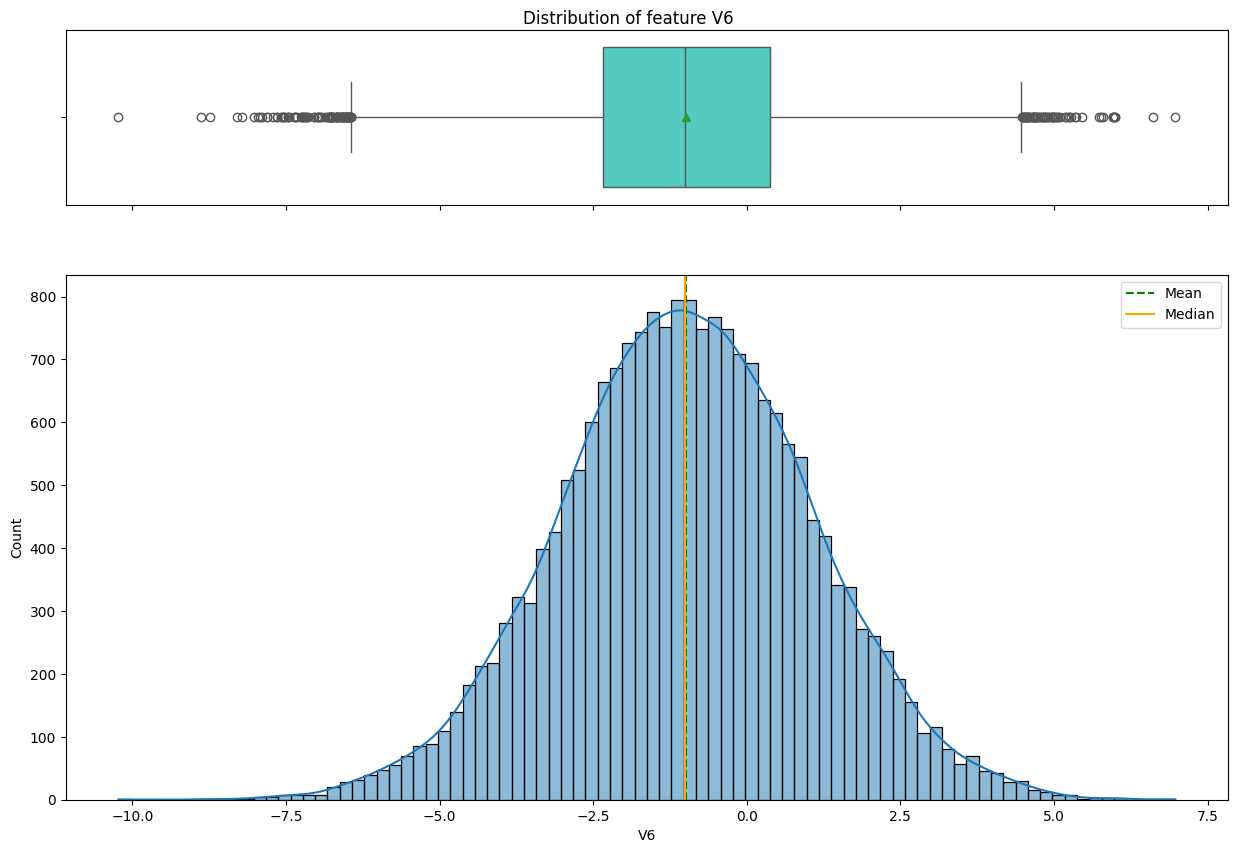

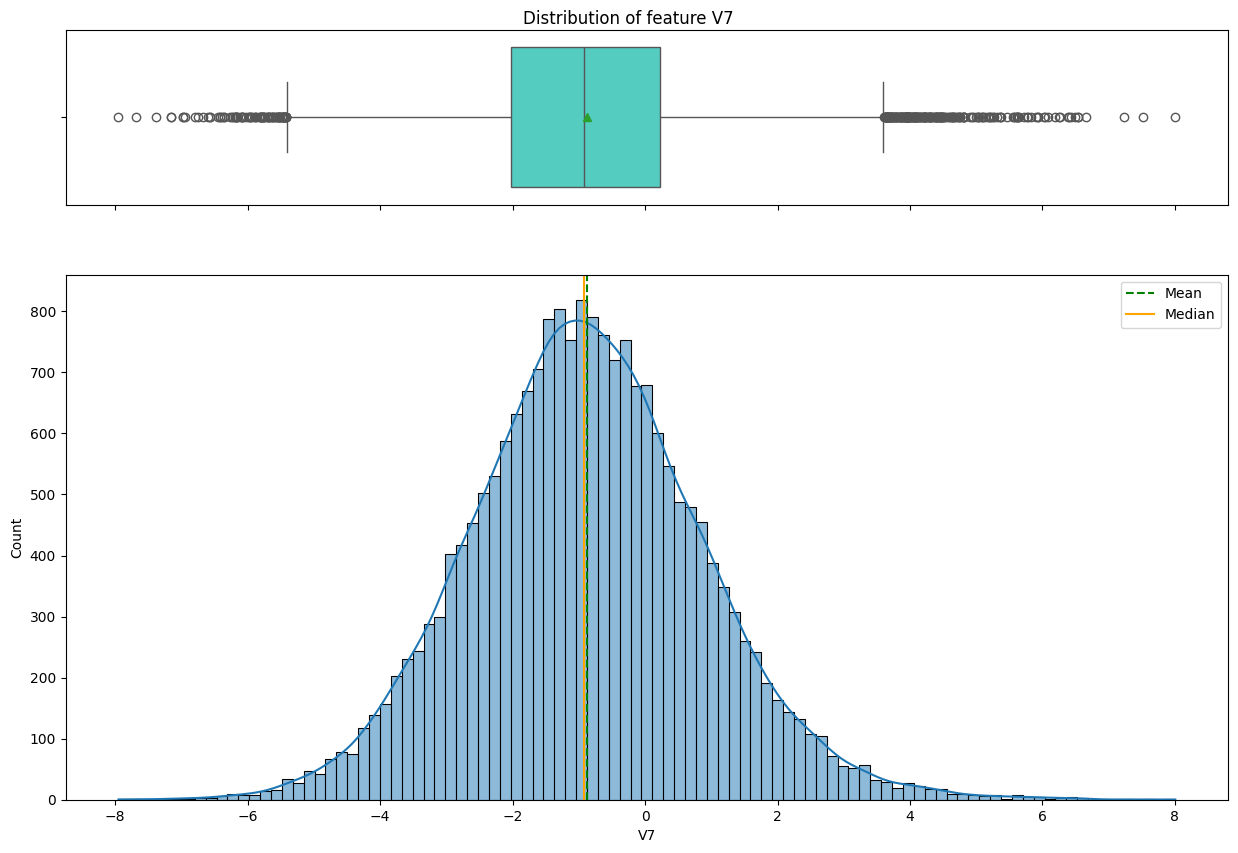

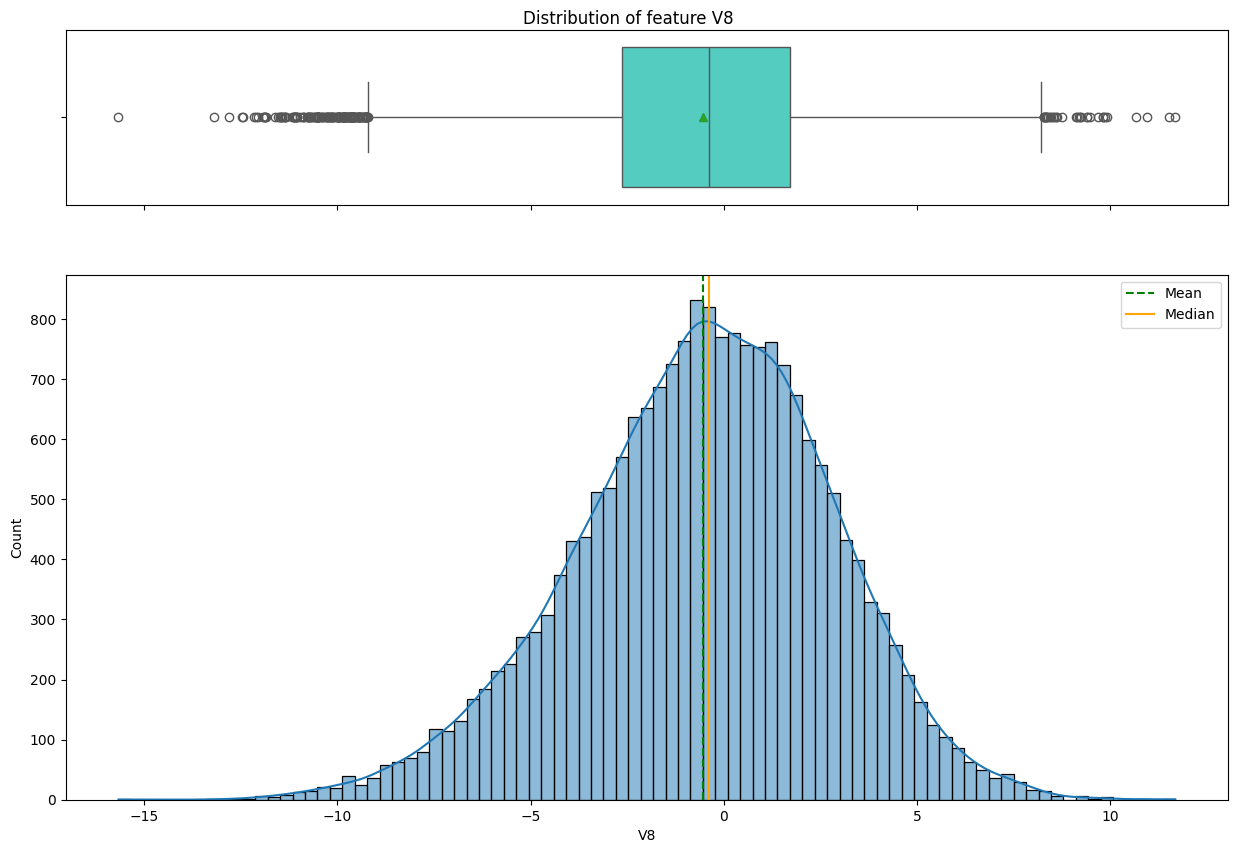

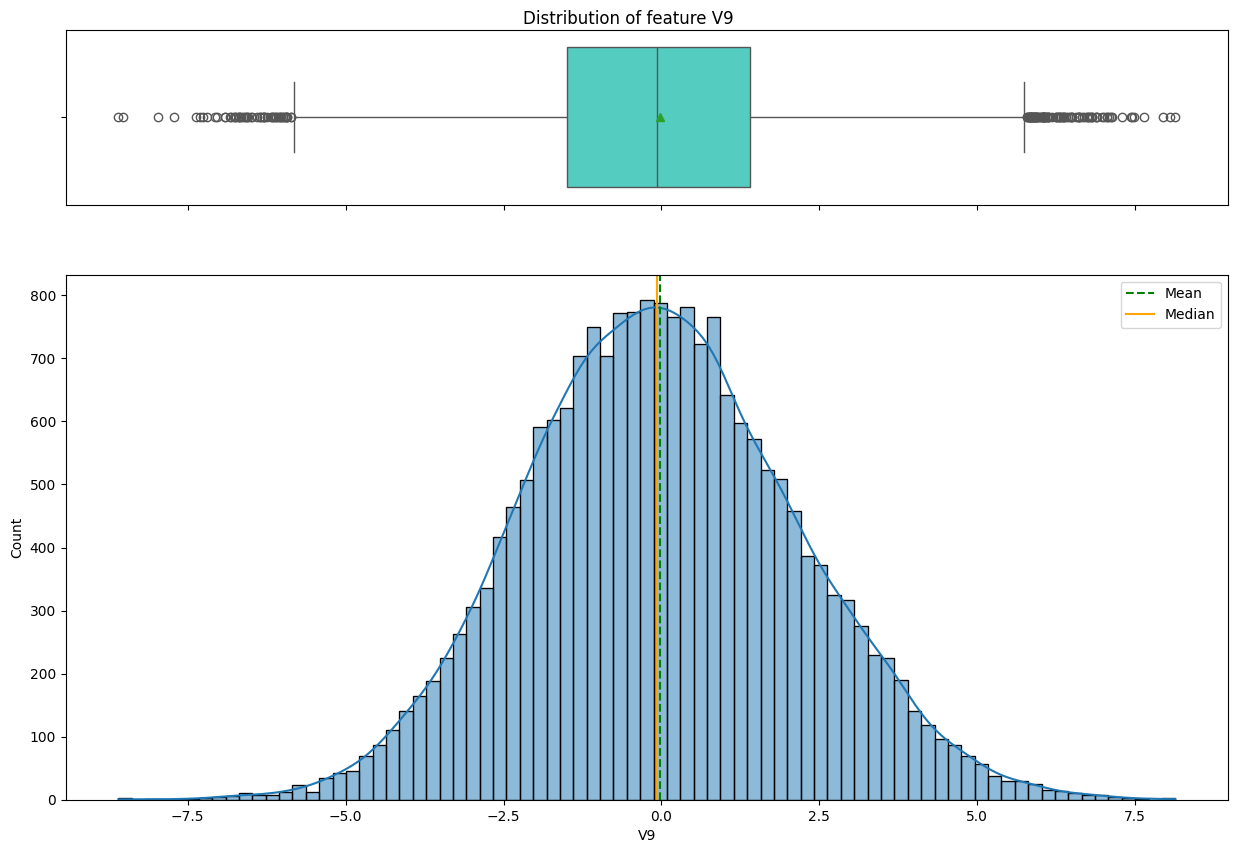

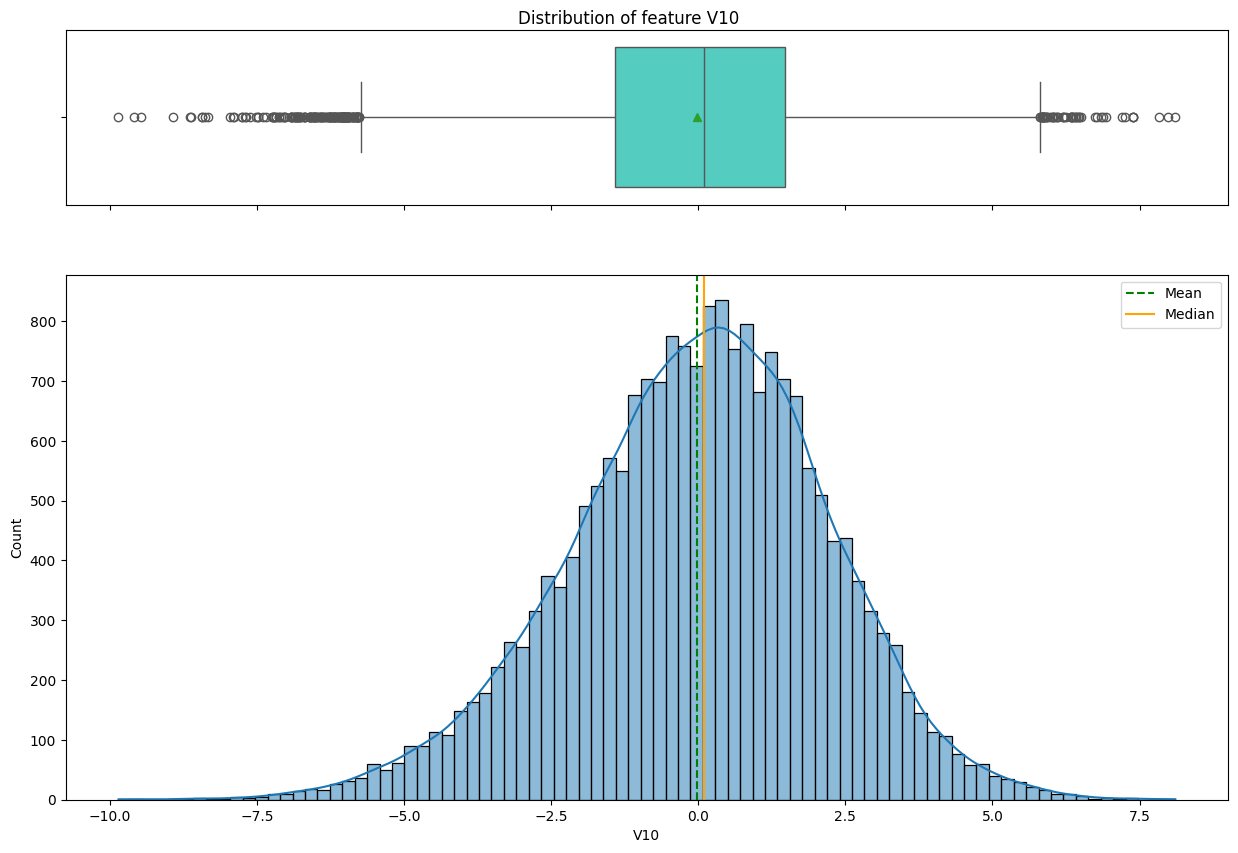

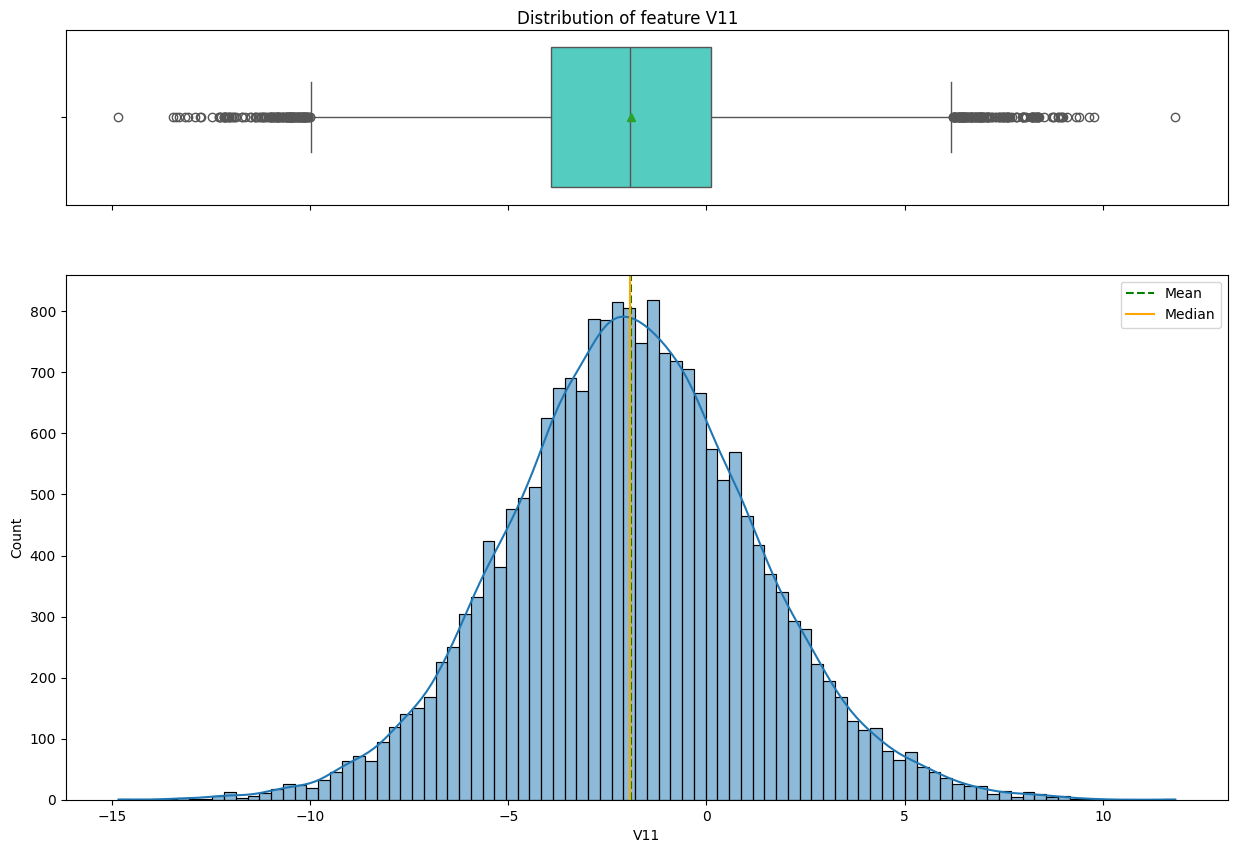

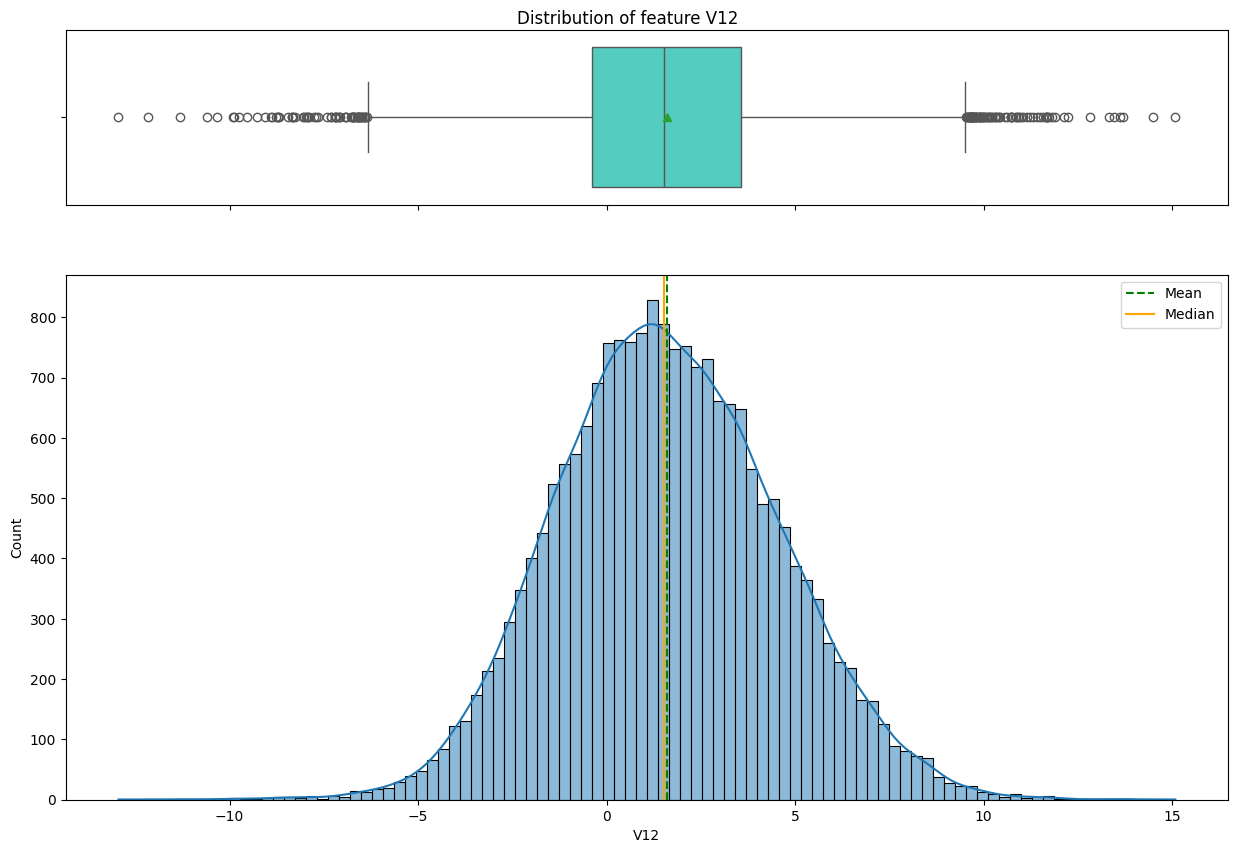

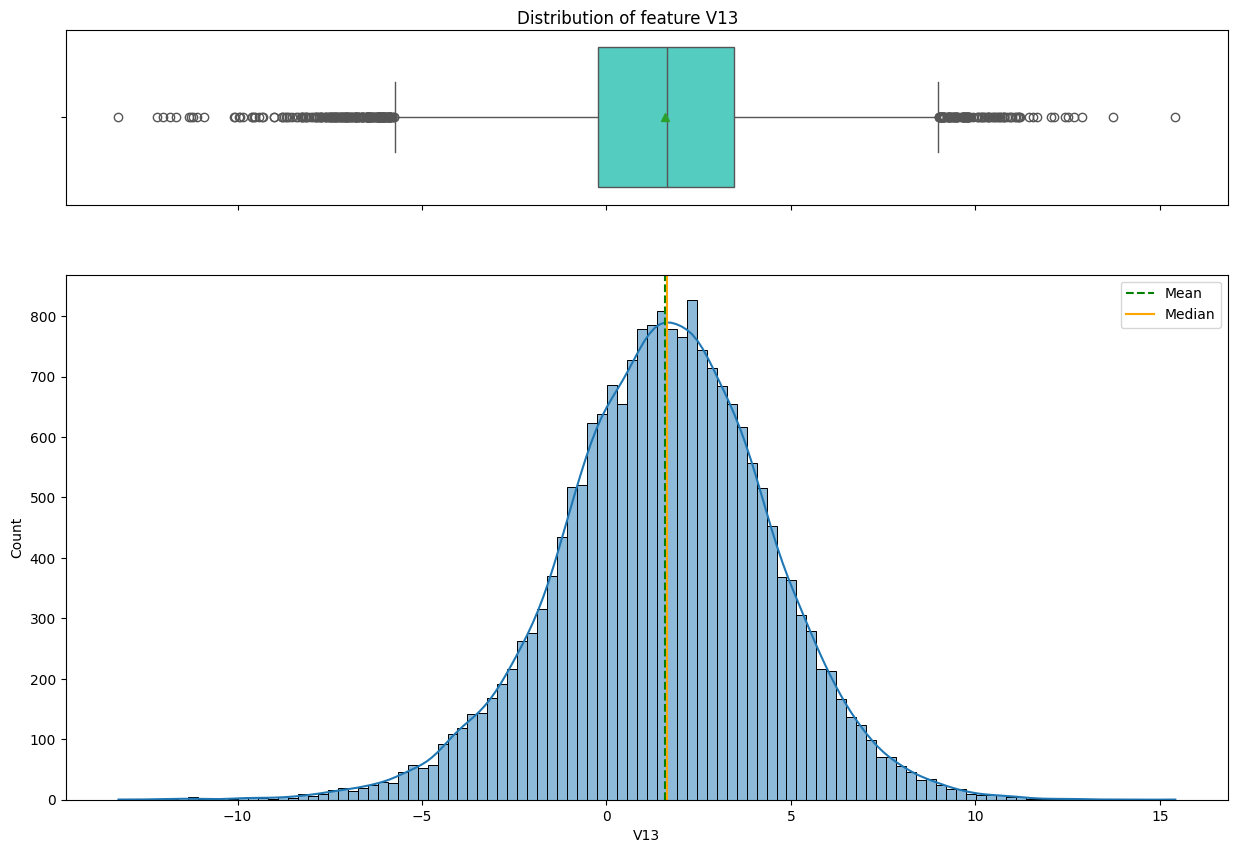

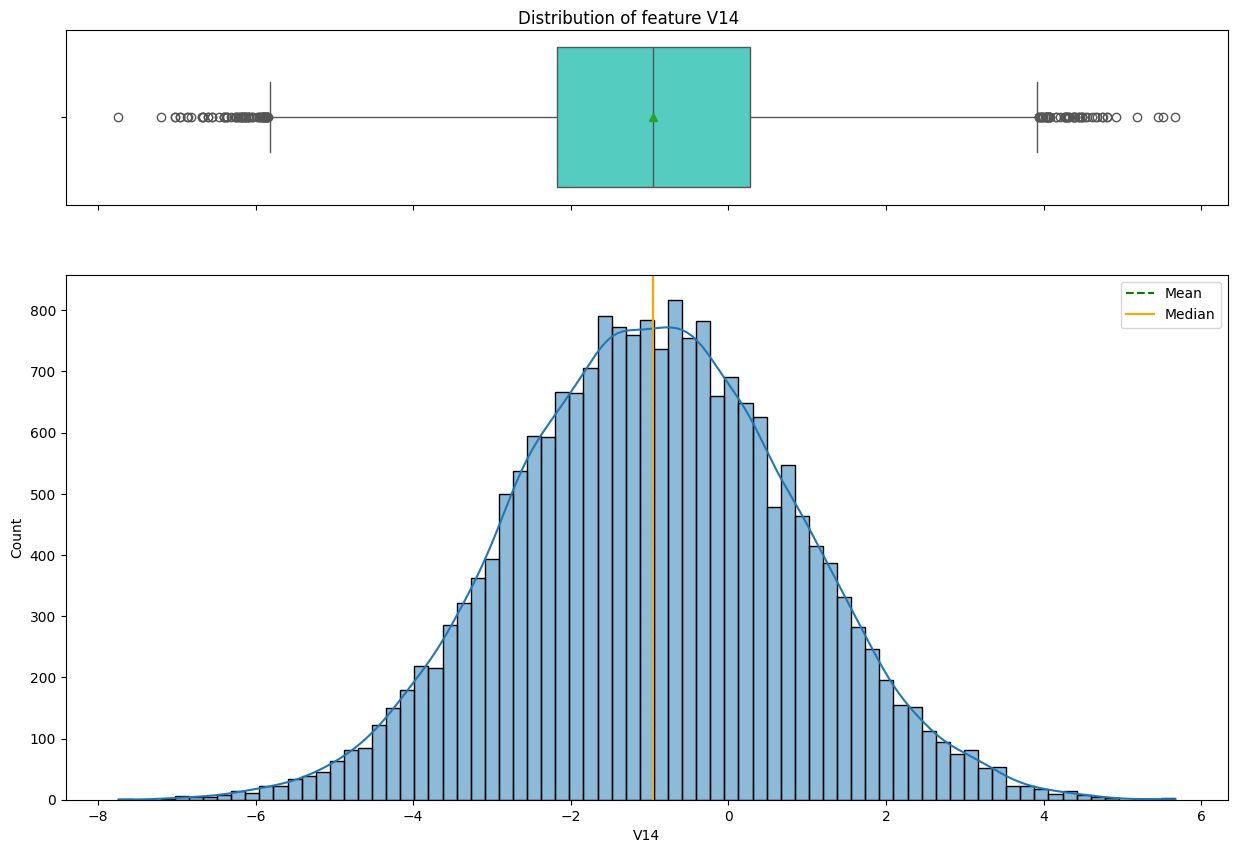

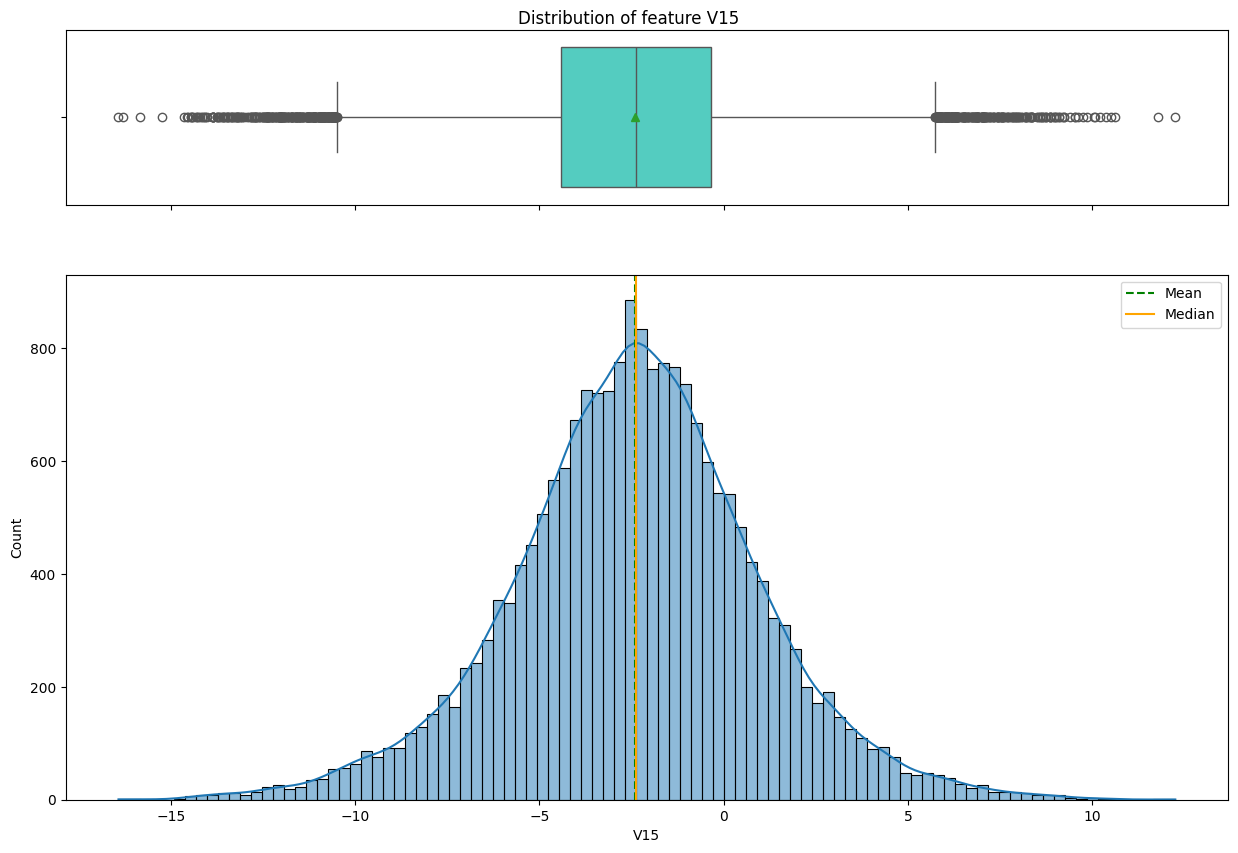

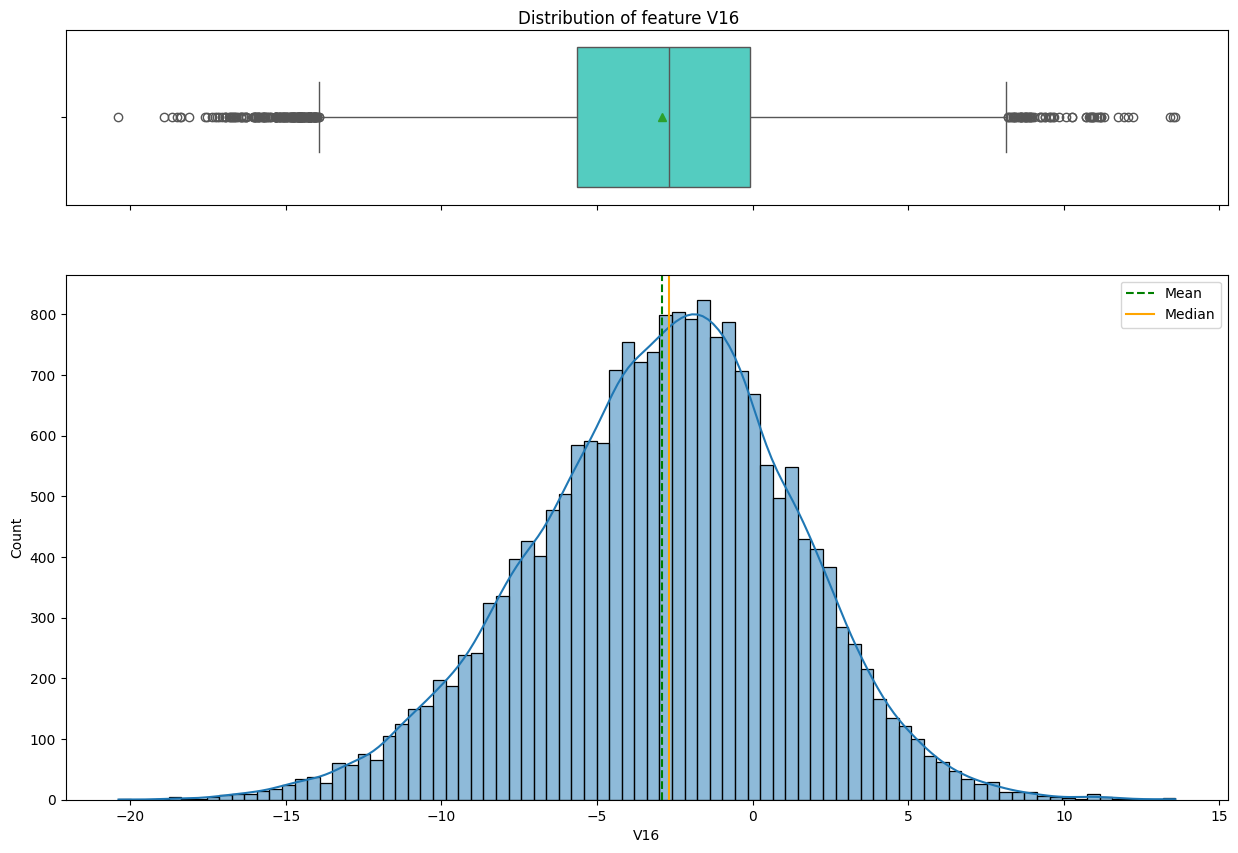

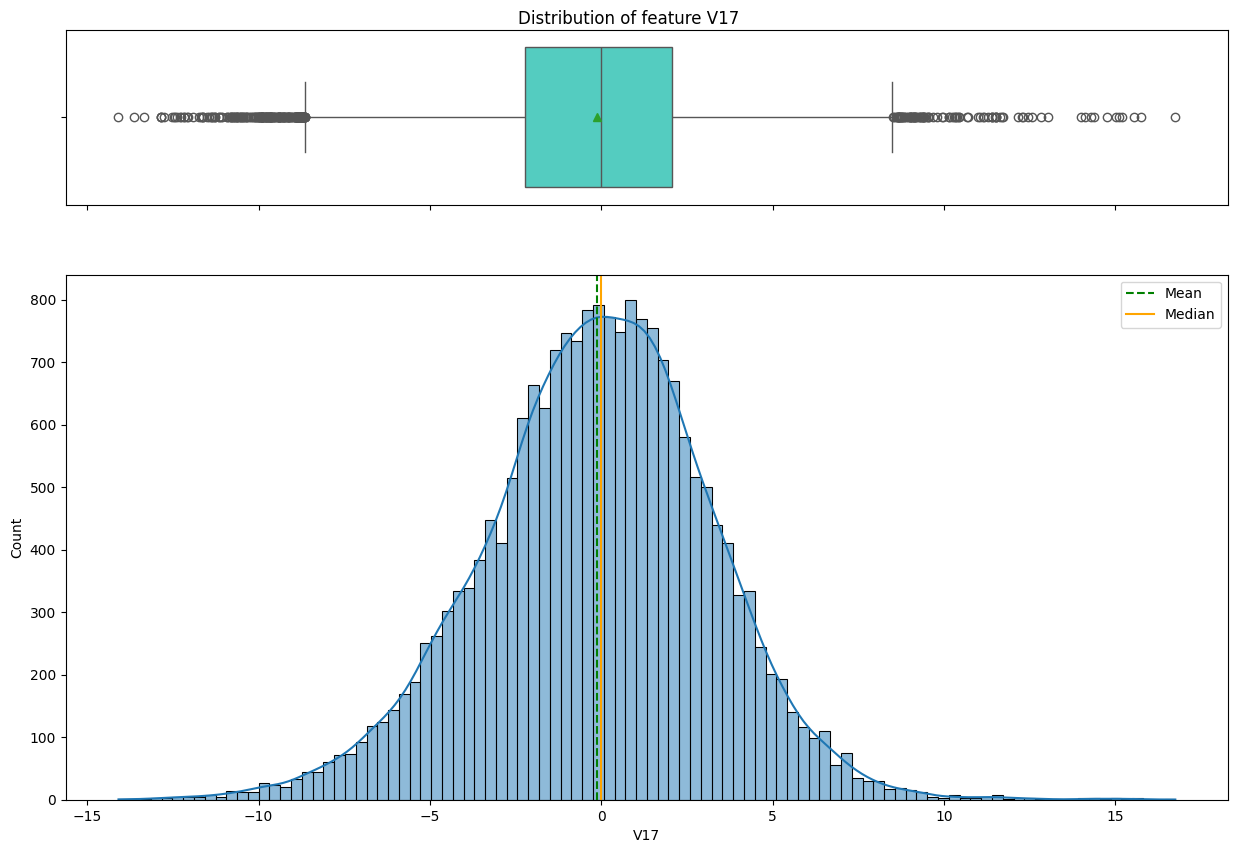

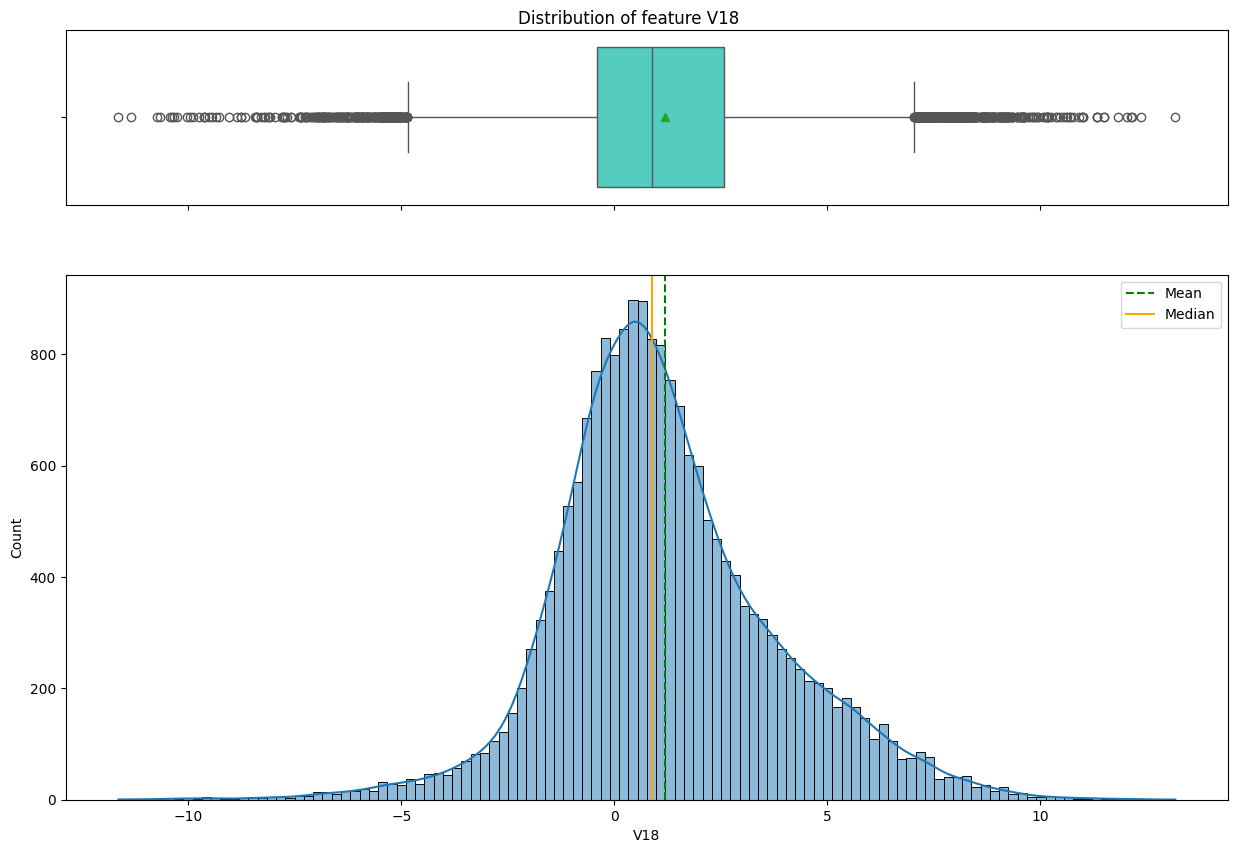

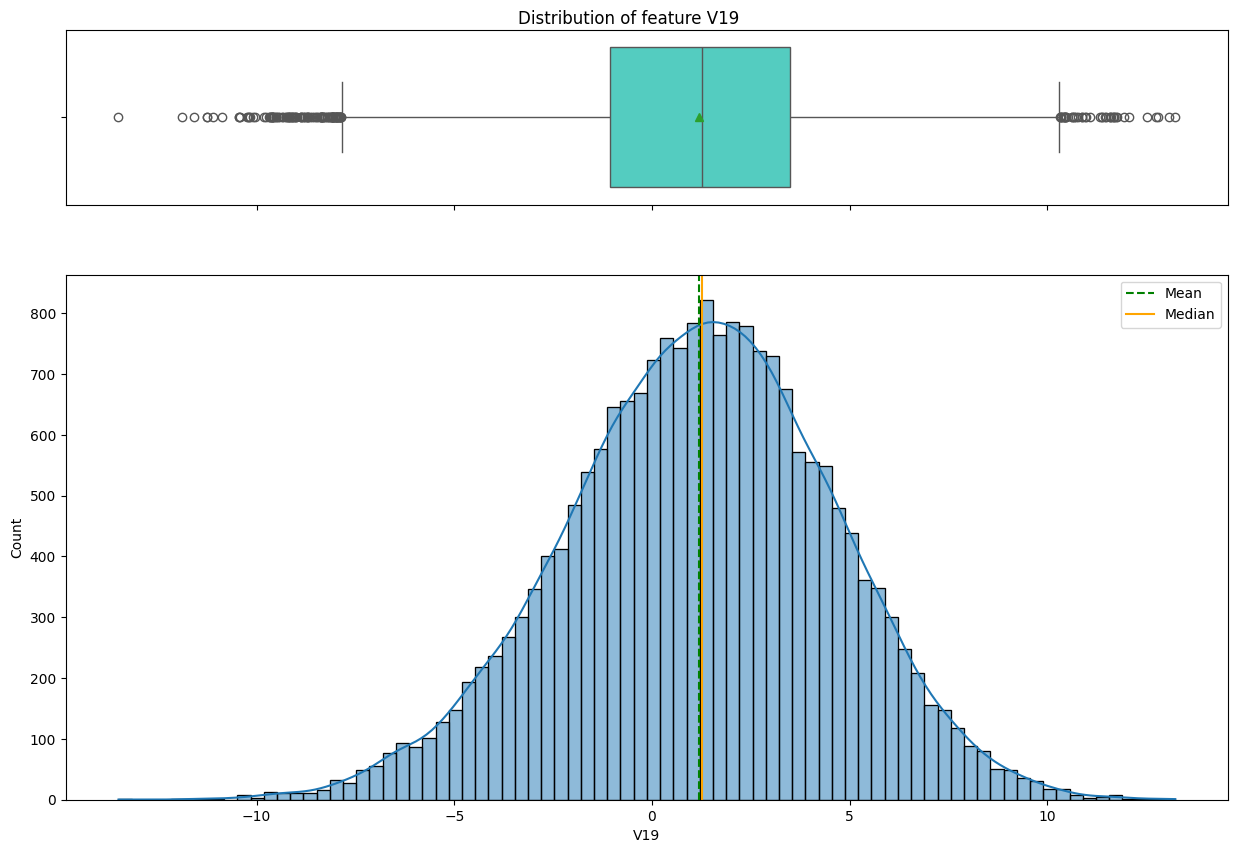

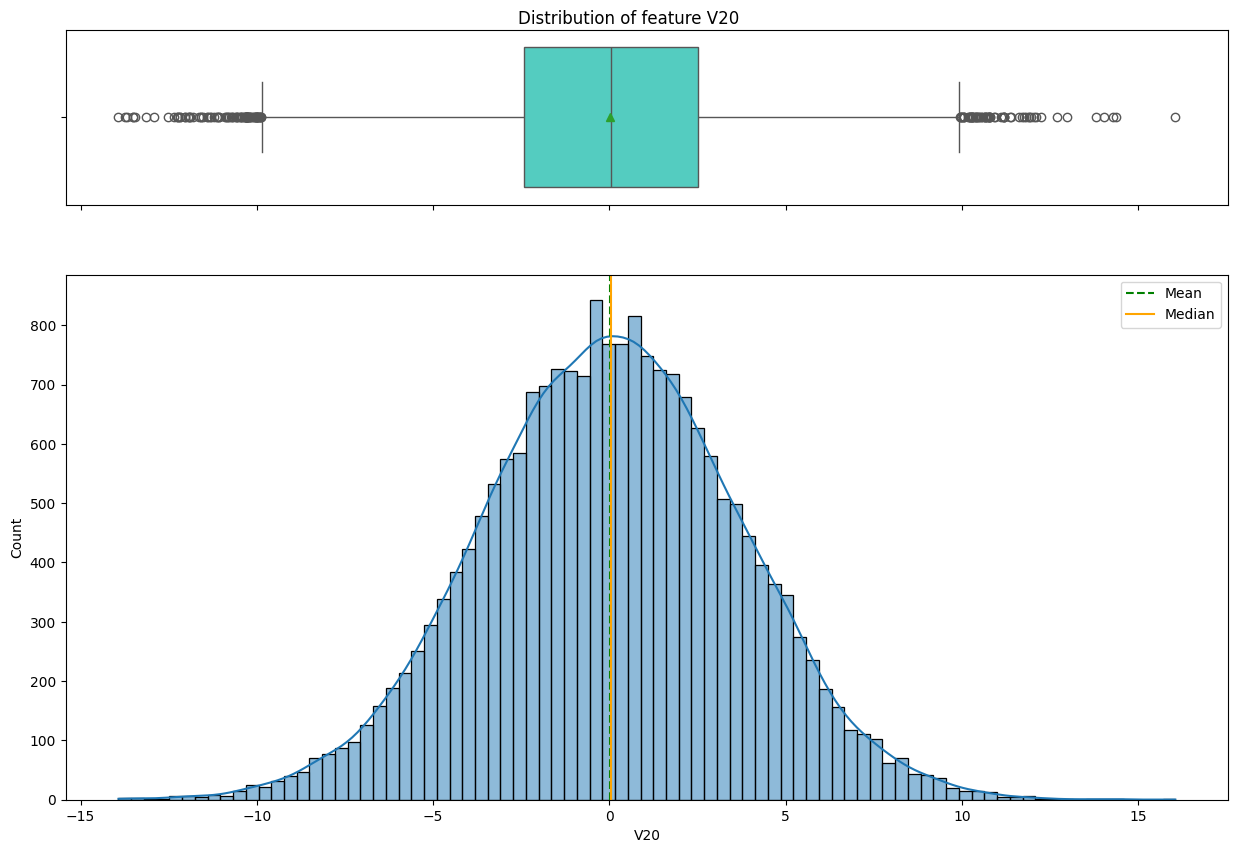

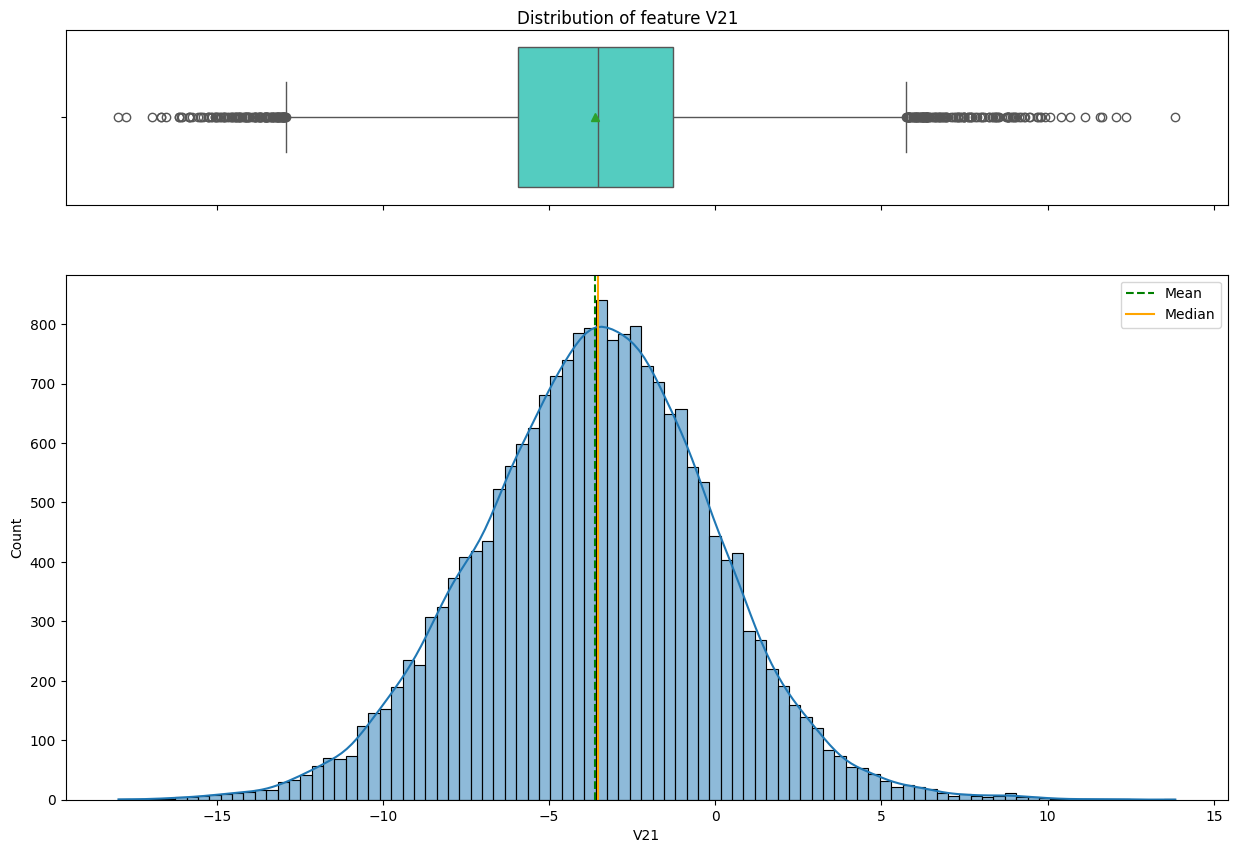

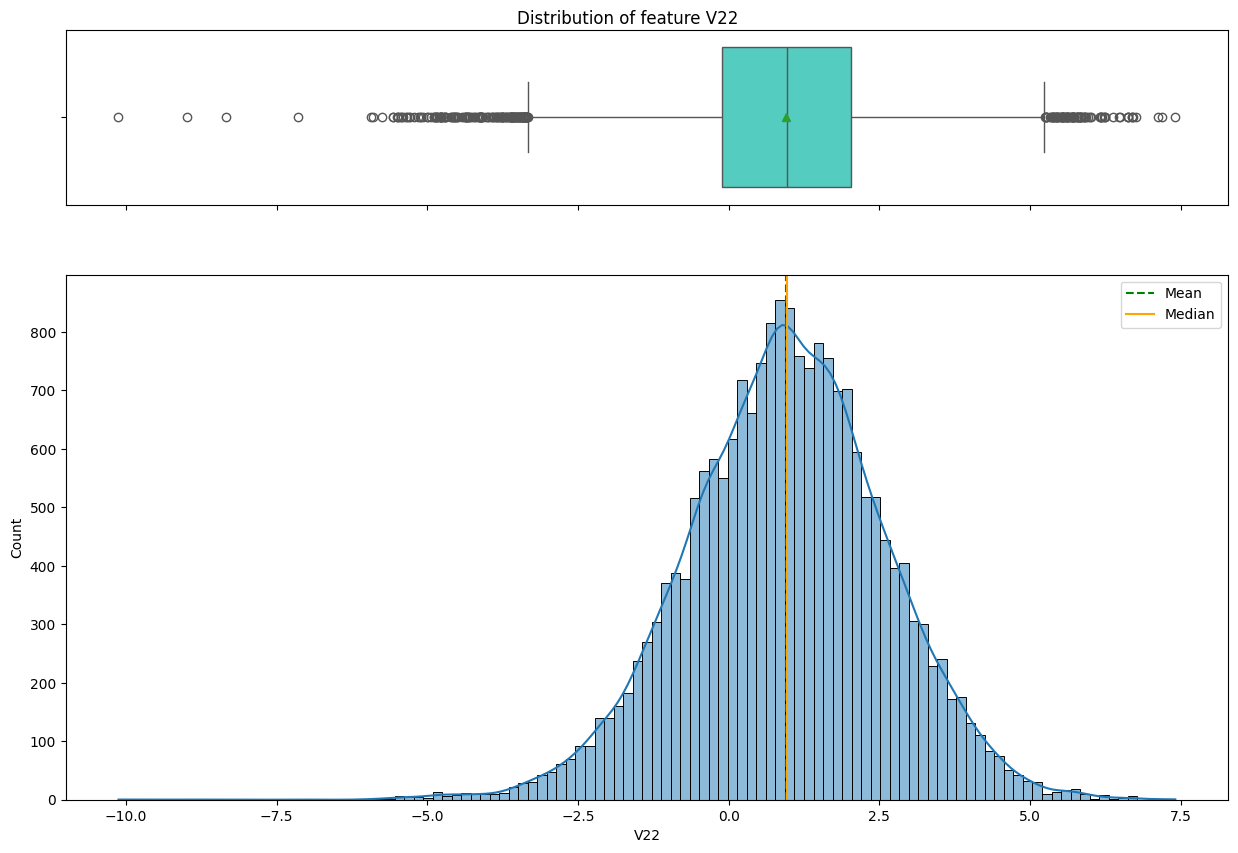

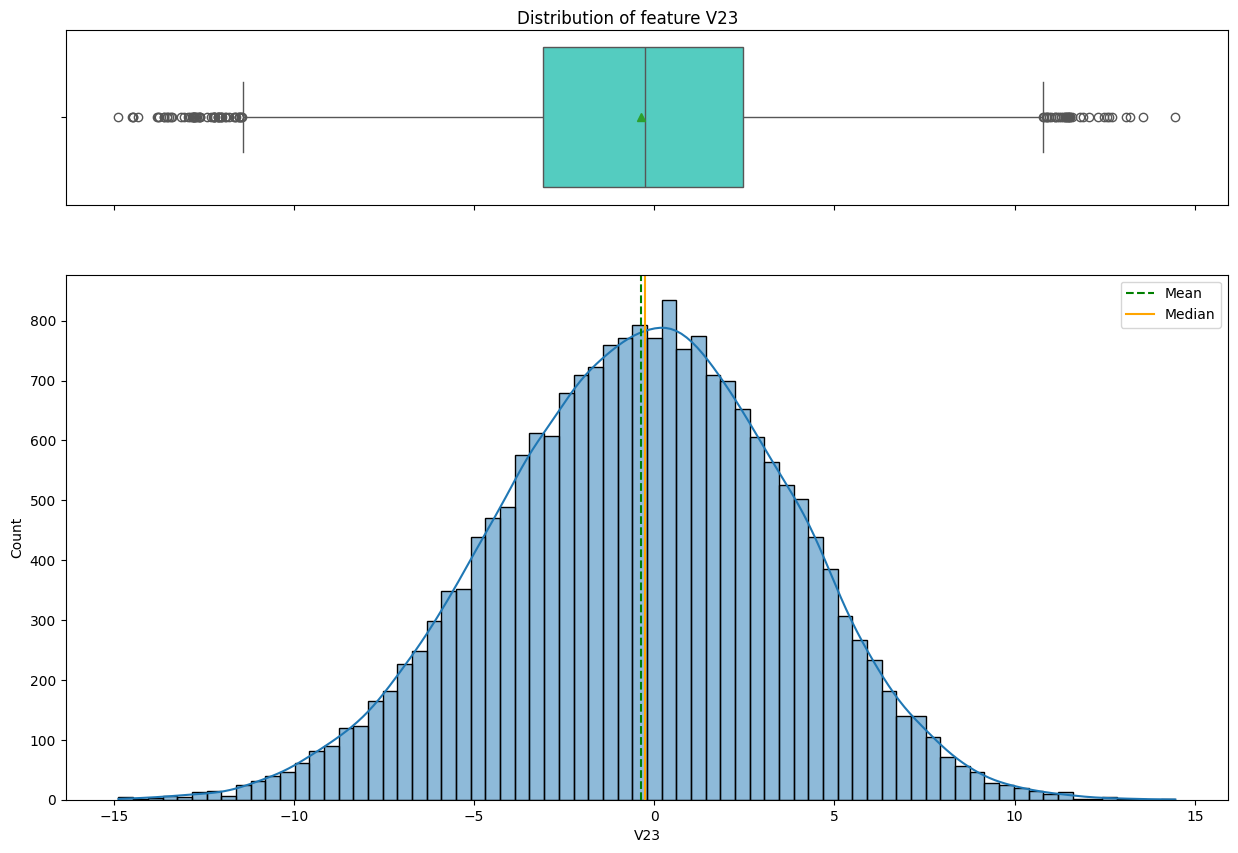

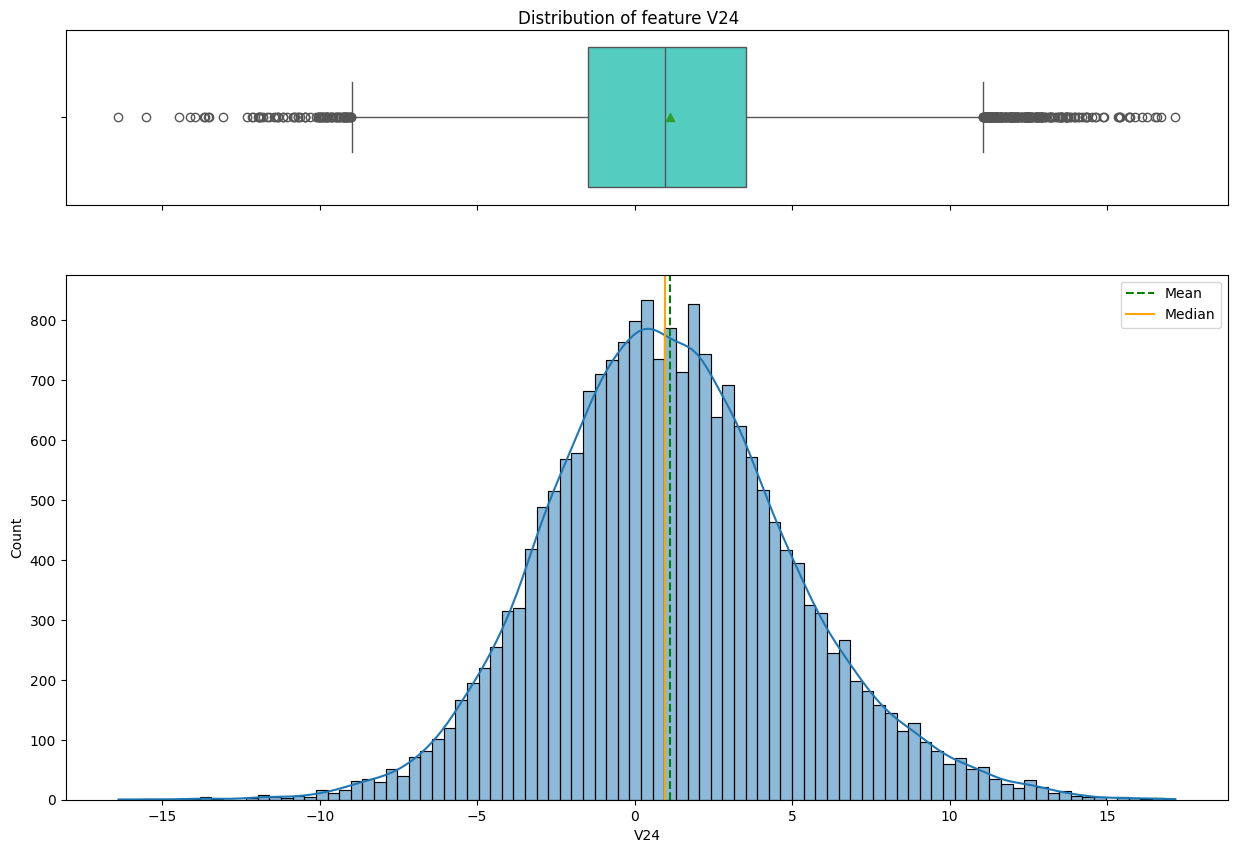

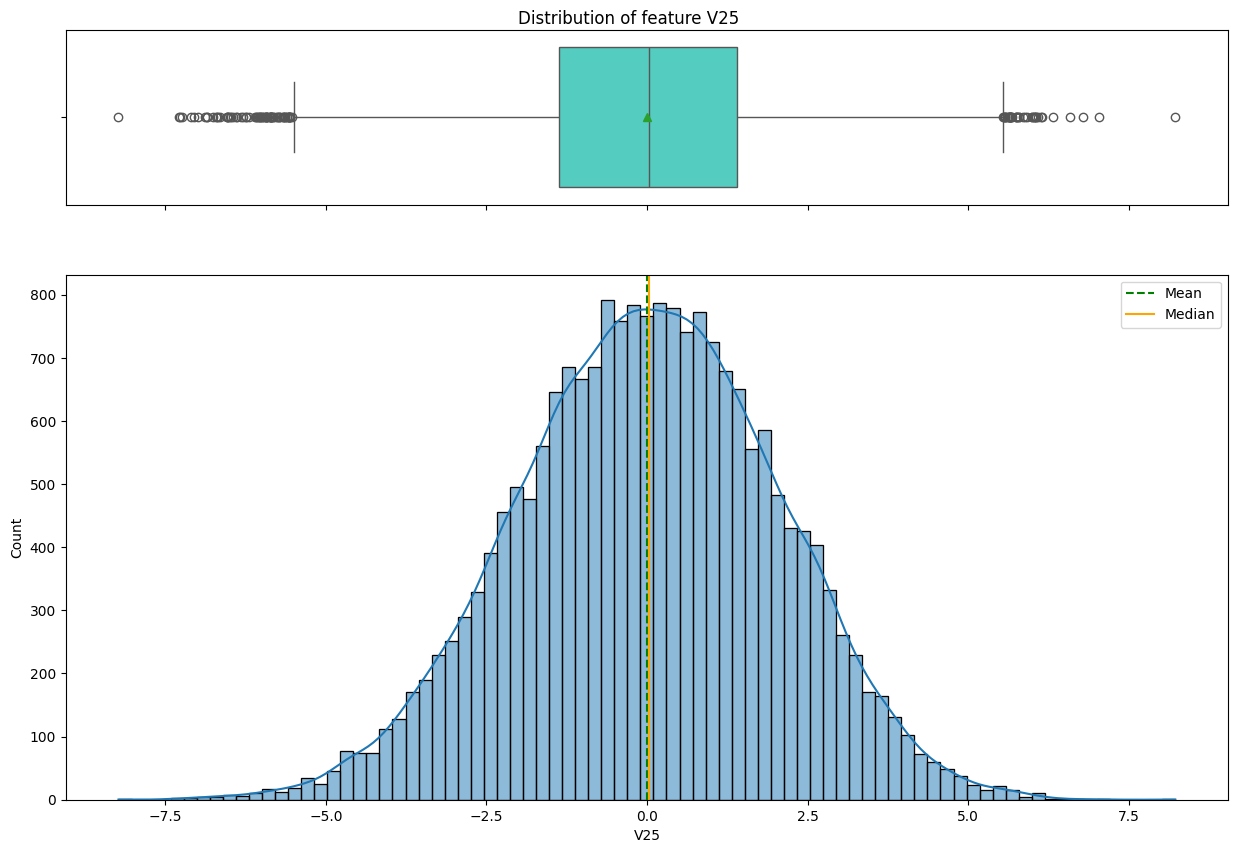

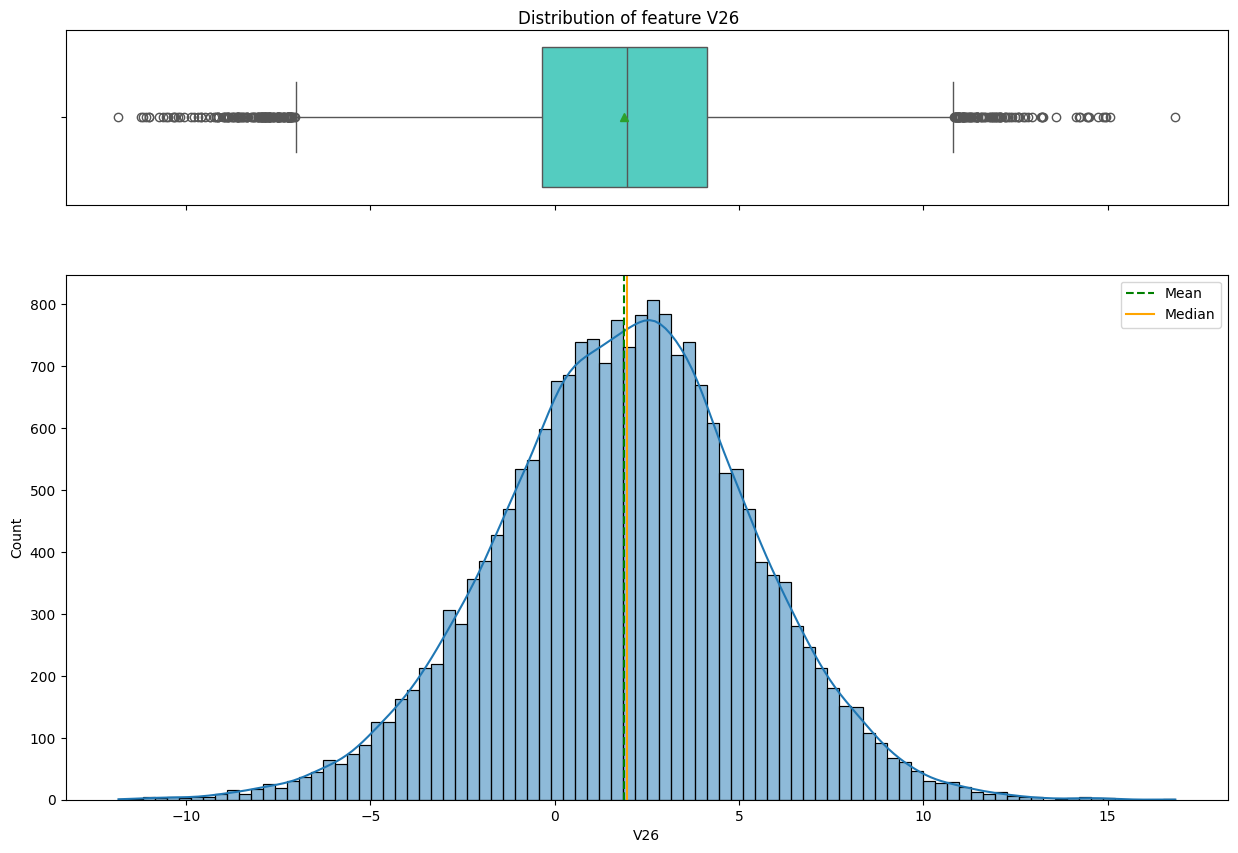

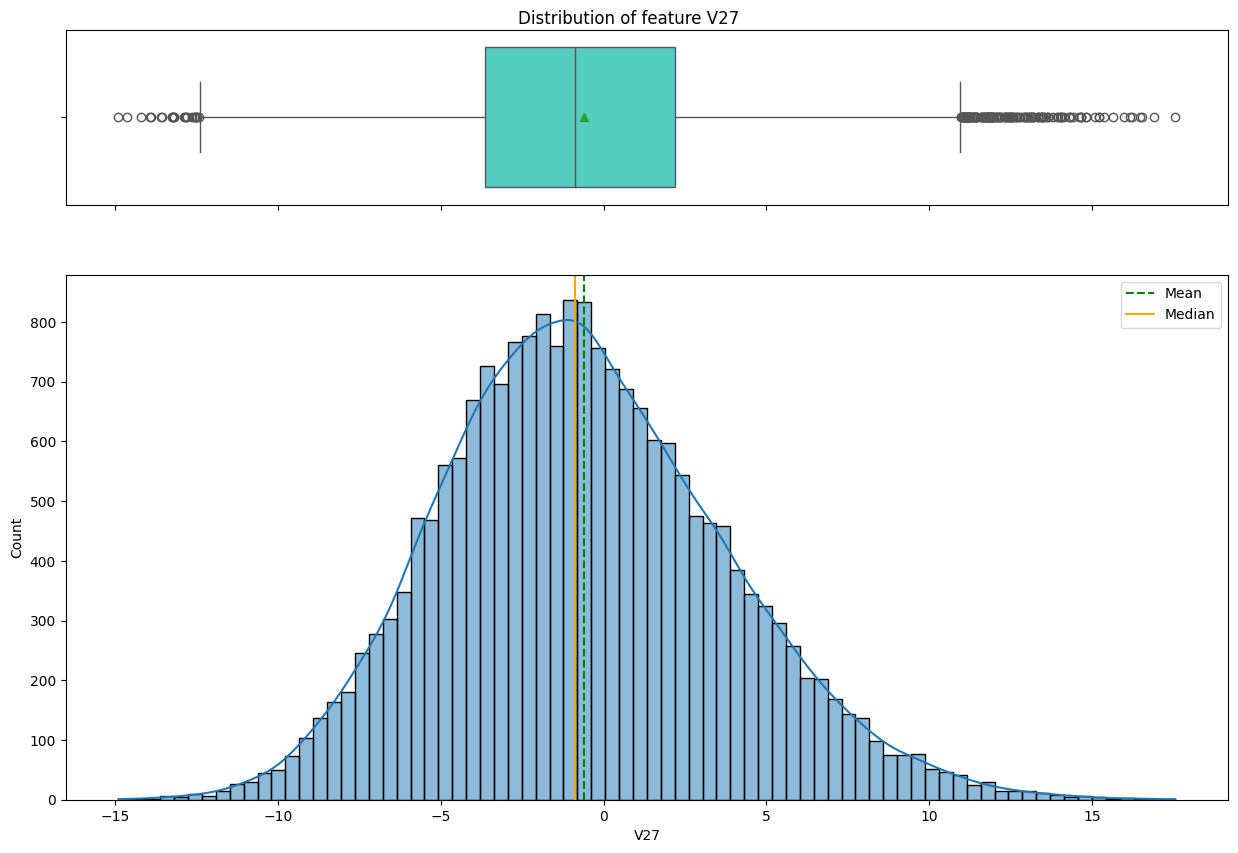

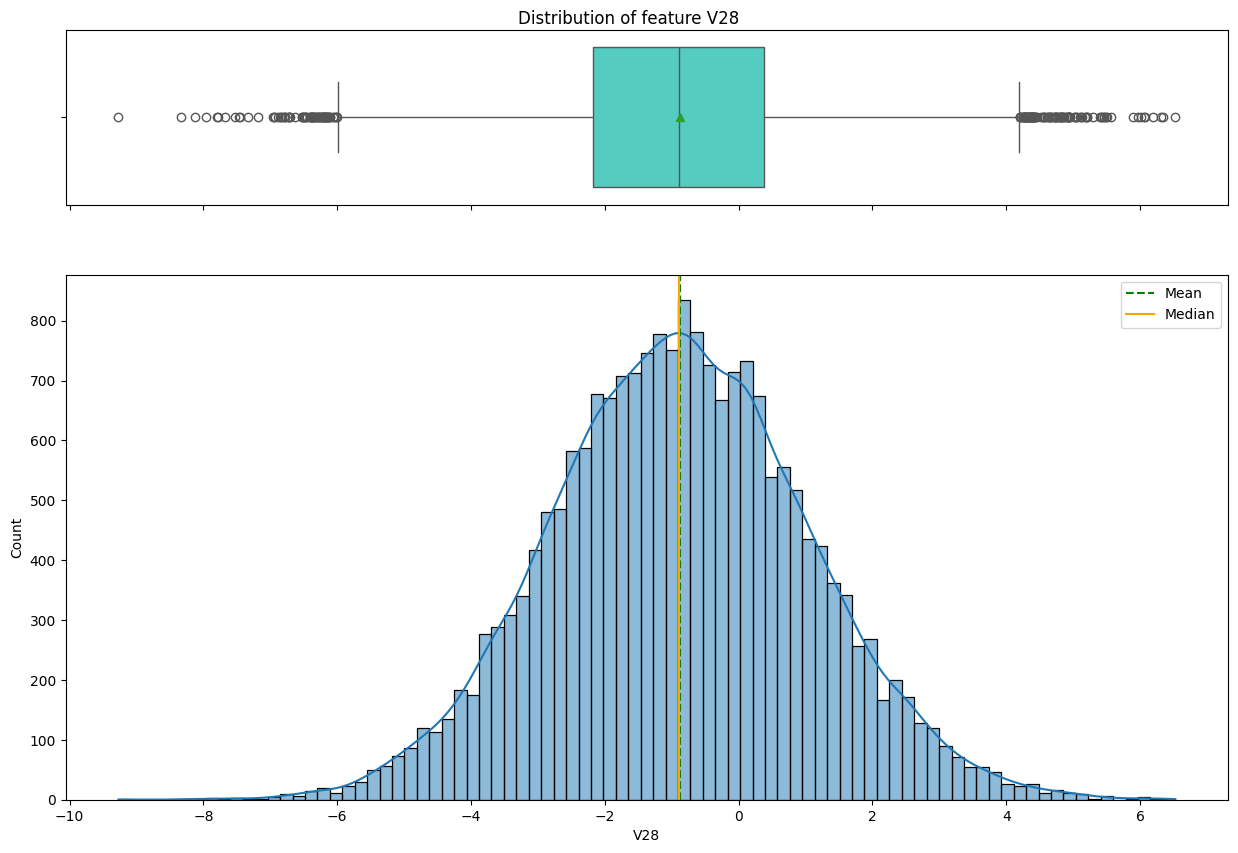

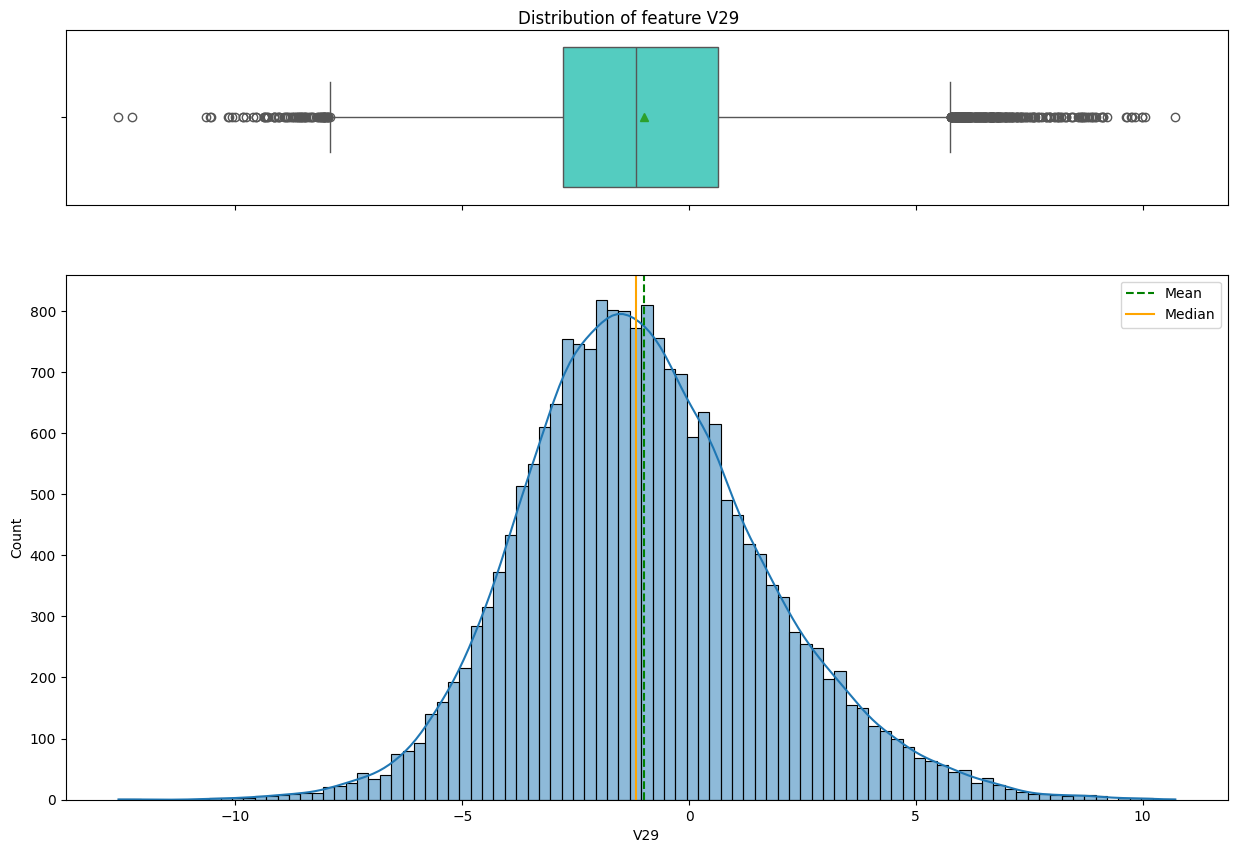

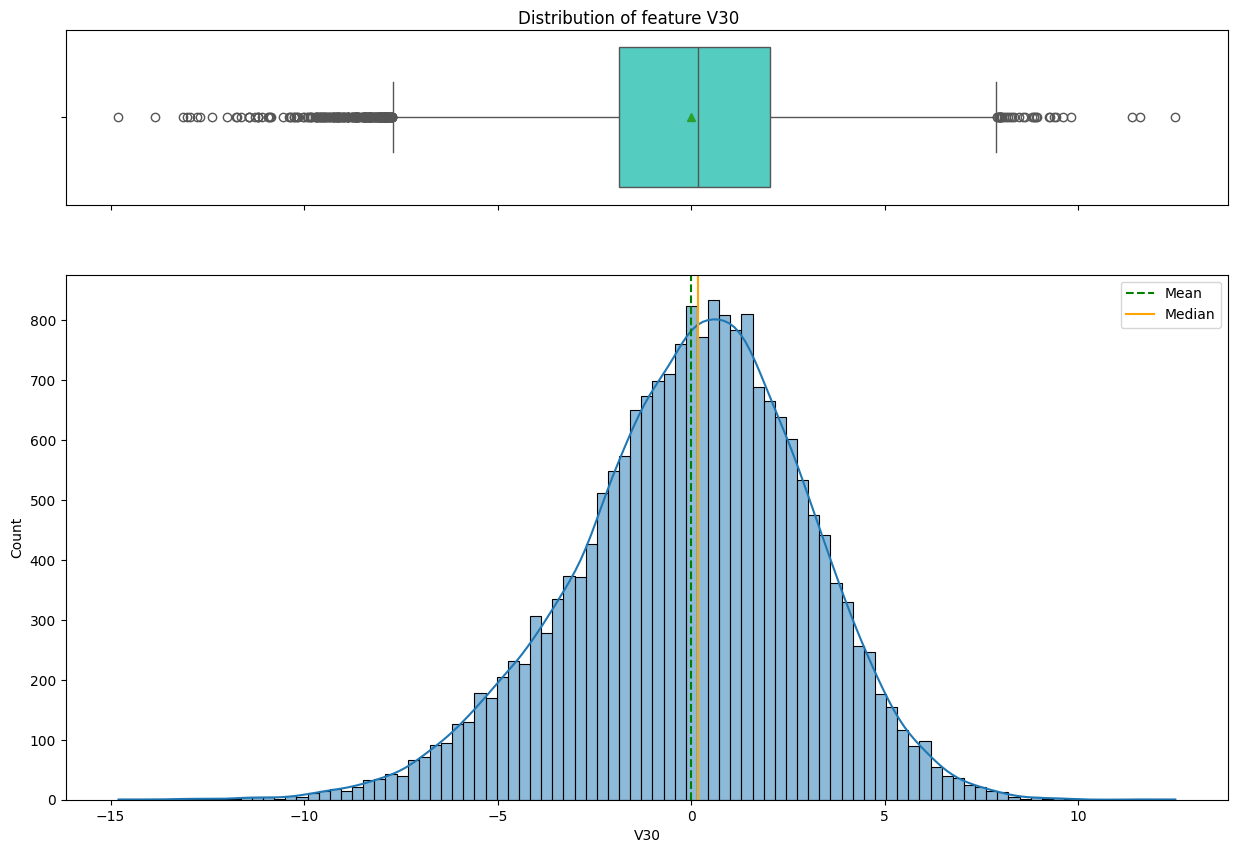

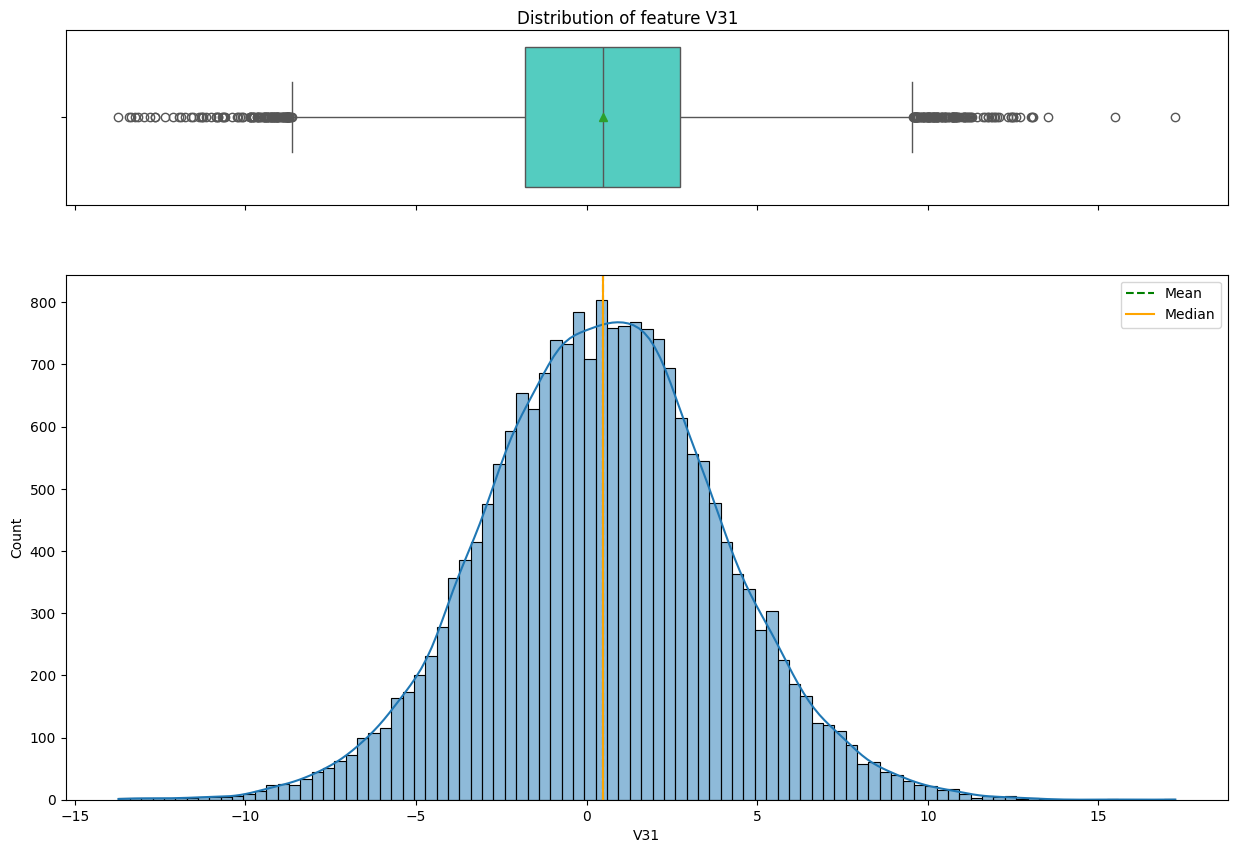

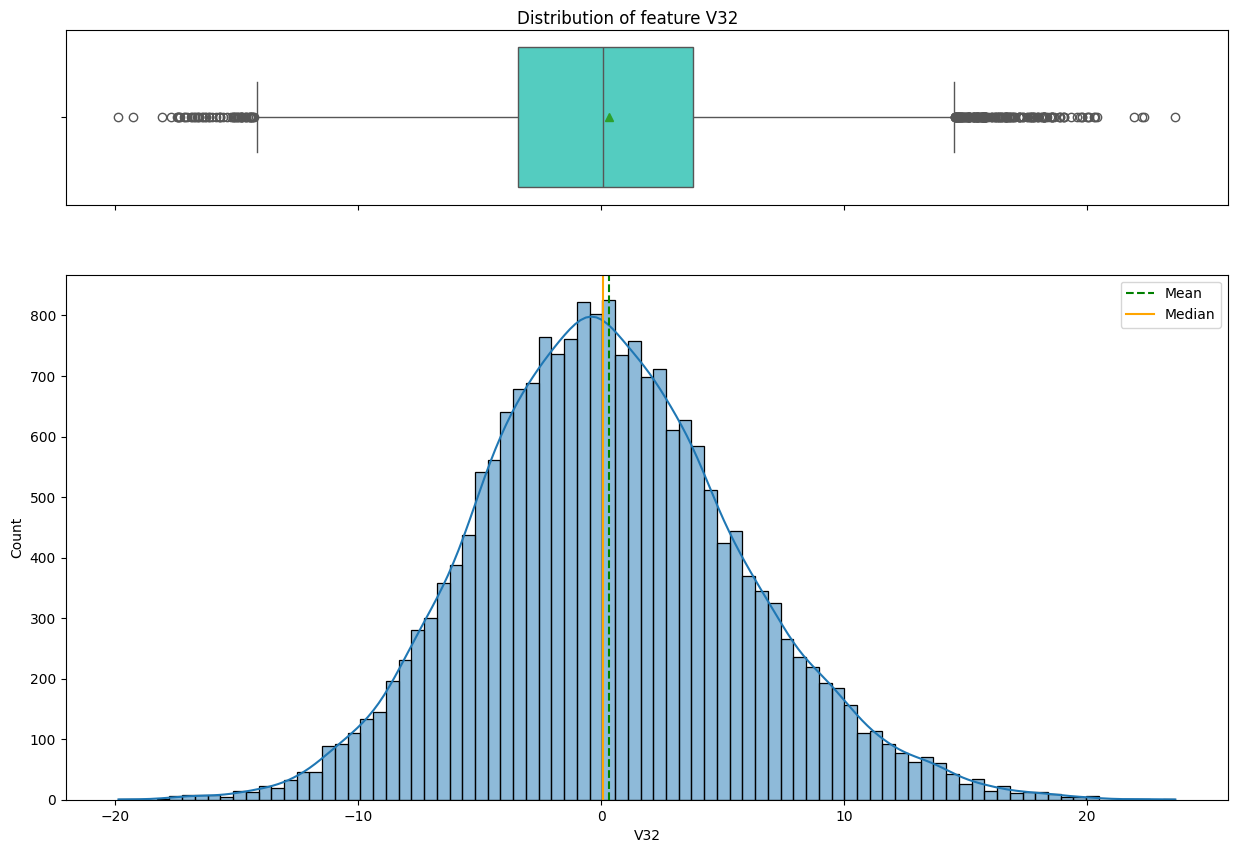

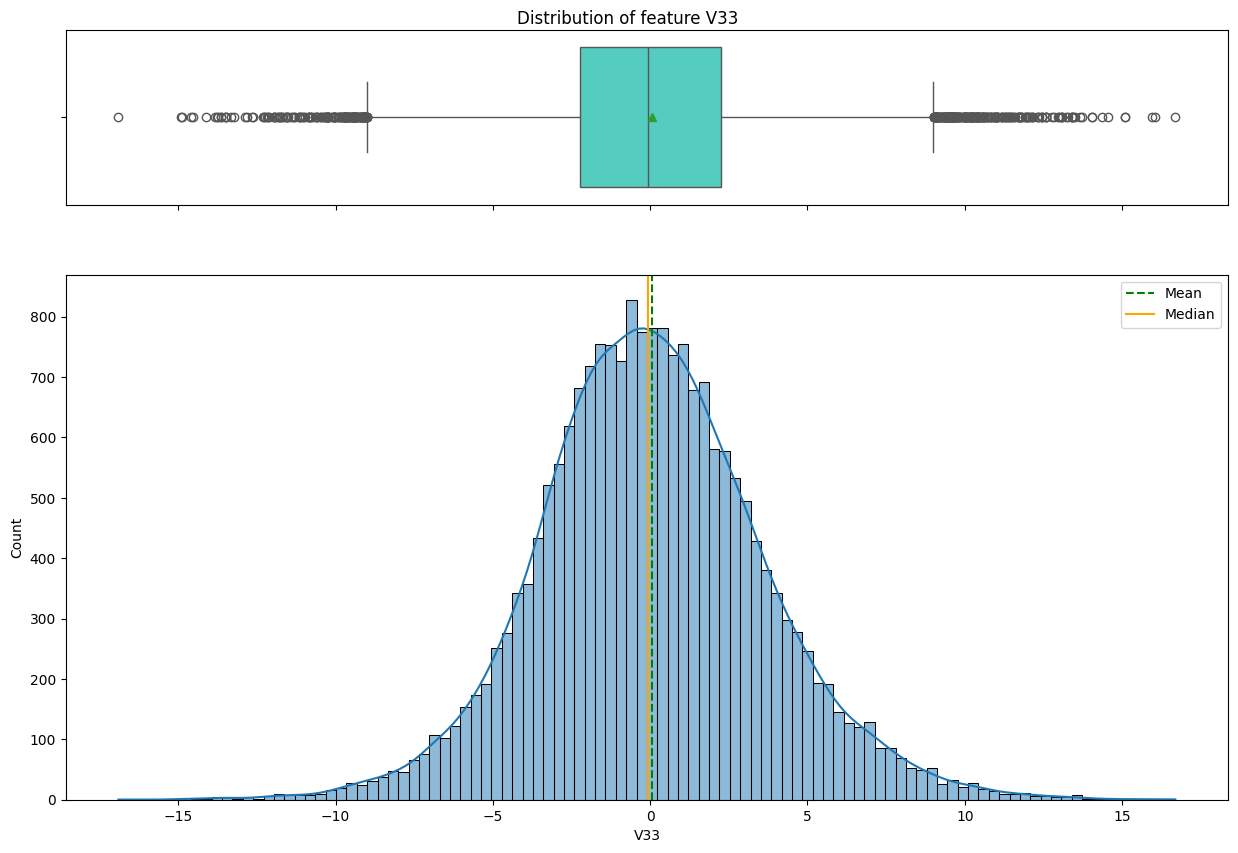

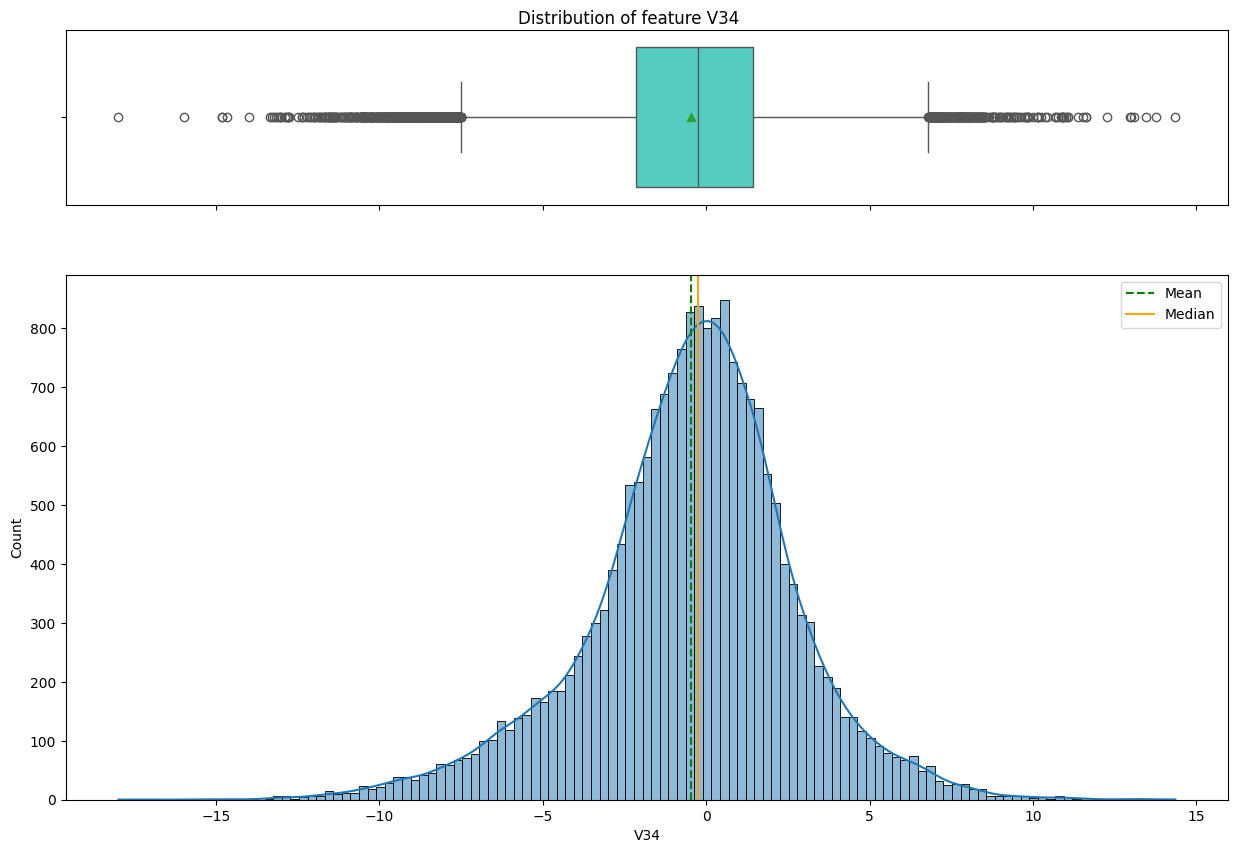

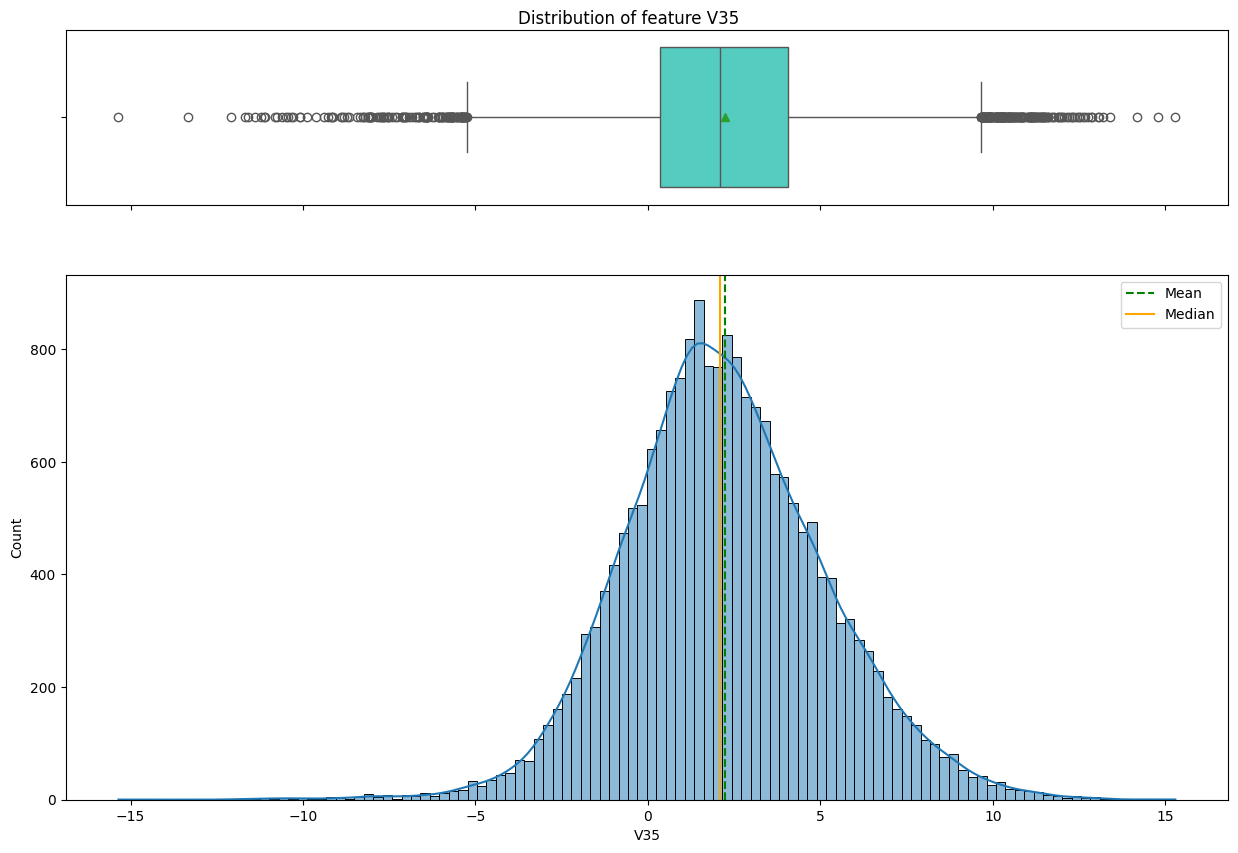

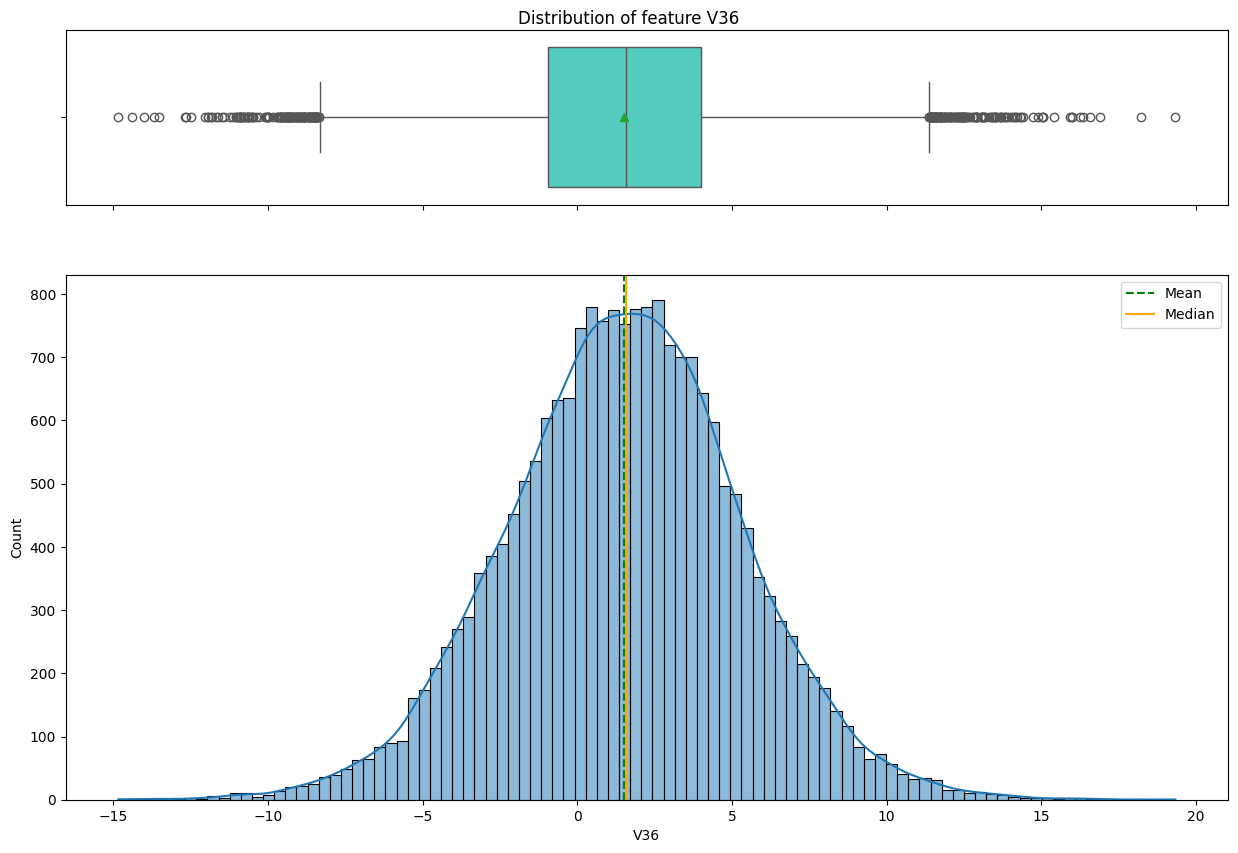

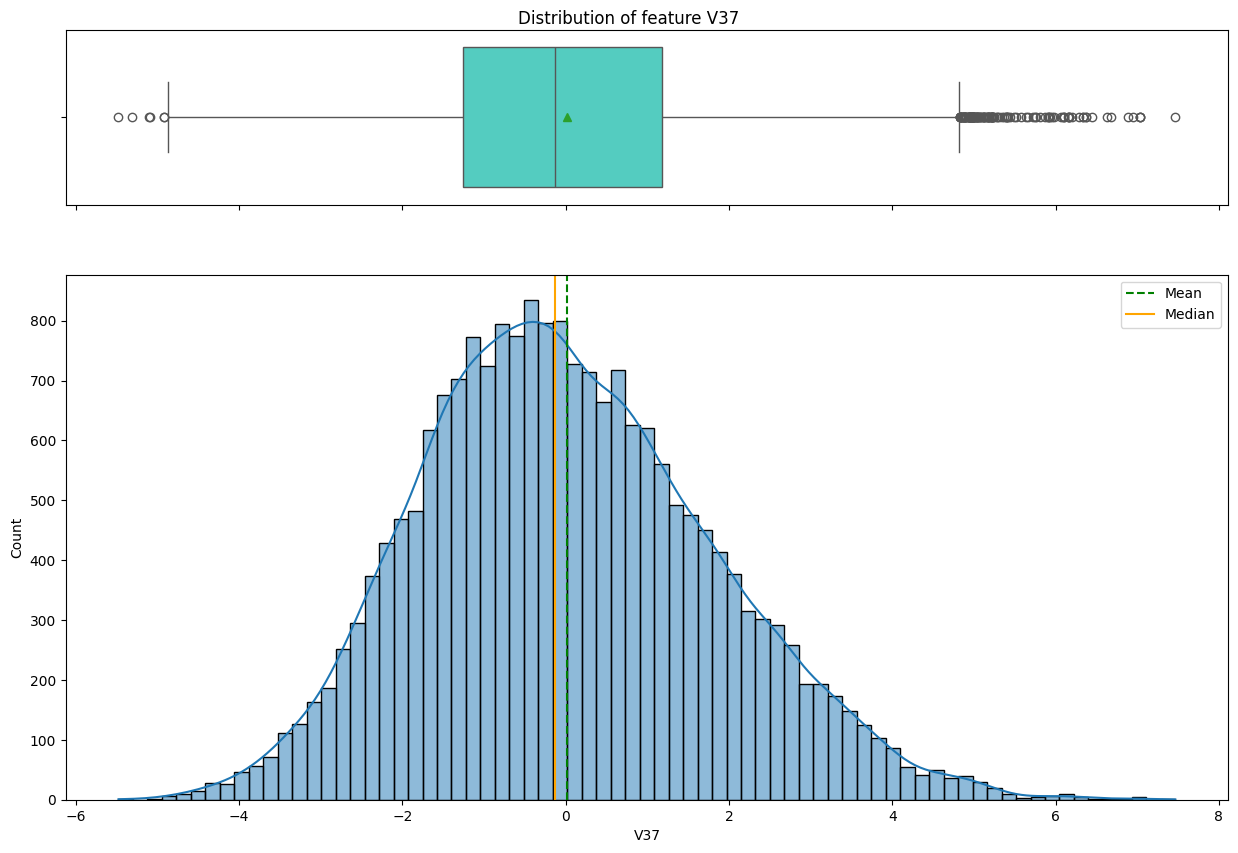

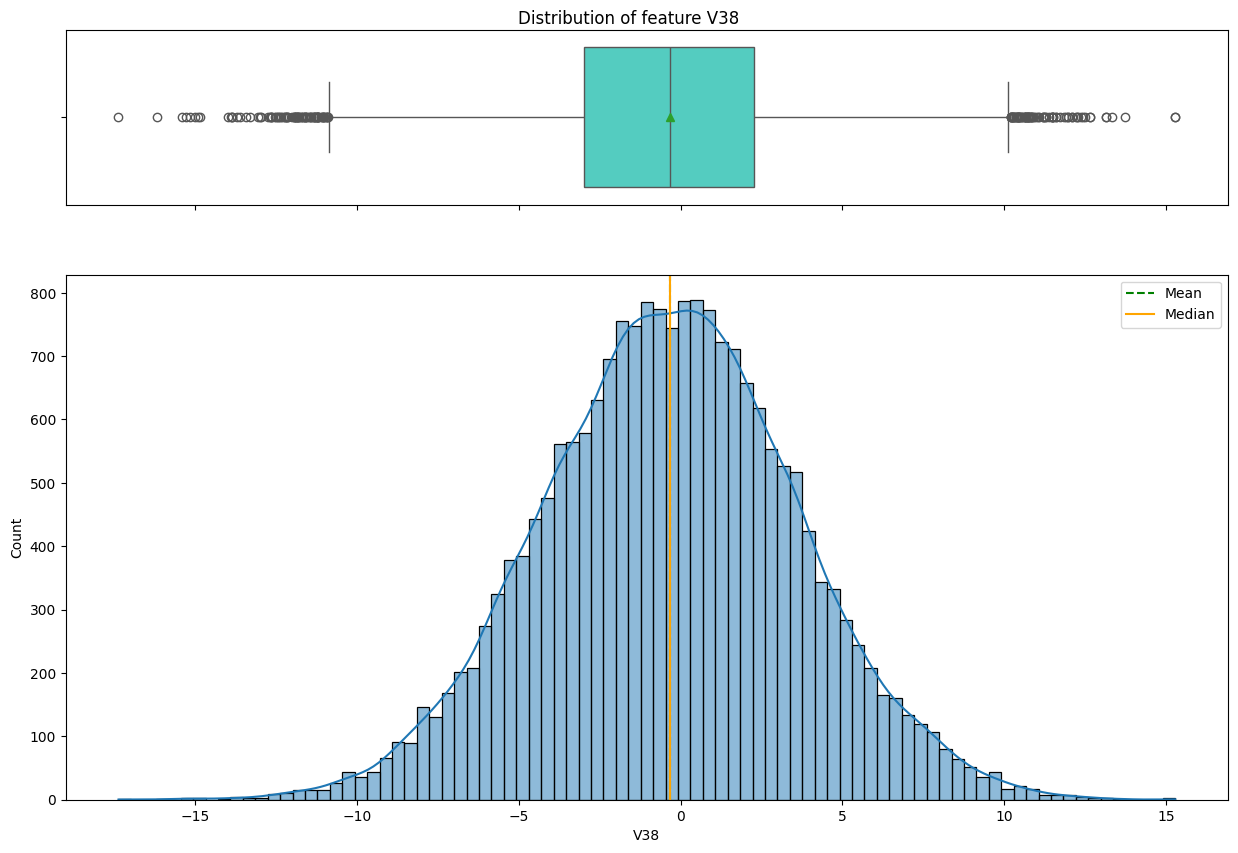

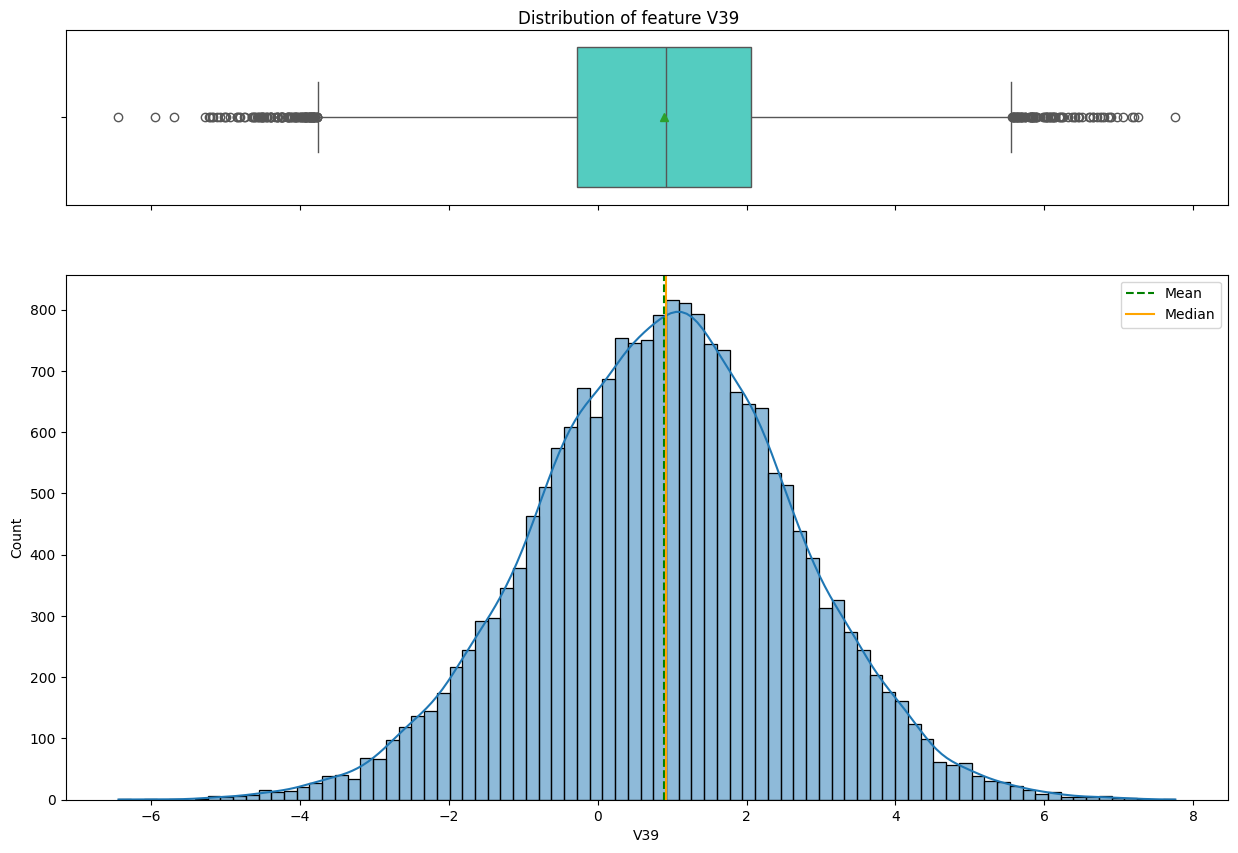

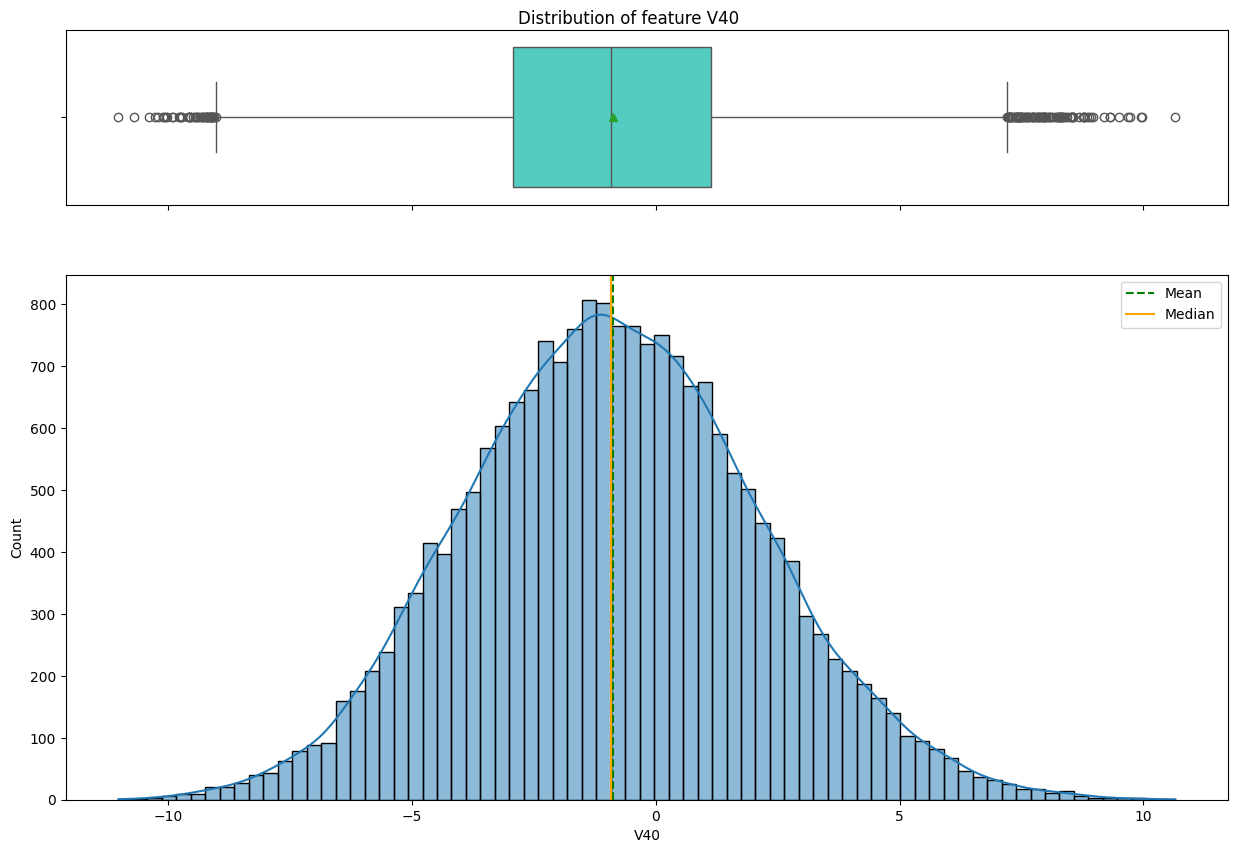

In [47]:
for feature in data.columns.to_list()[:-1]:
    histogram_boxplot(data, feature, kde=True, bins=None, title=f"Distribution of feature {feature}")

<span style="color: blue;"> **Observation**</span>
* The distributions of features V1 to V40 vary, with some exhibiting symmetry and others showing skewness.
* The box plots reveal the presence of outliers in almost all the features
* While the direct meaning of these ciphered features is unknown, their varying scales (also seen from describe() function) are important considerations for subsequent data preprocessing steps like normalization/standardization

### 4.2.2 Check the distrubution of Target variable

In [49]:
# For train data
data["Target"].value_counts(1)

,proportion
Target,
0.0,0.9445
1.0,0.0555


In [50]:
# display the proportion of the target variable in the test data
data_test["Target"].value_counts(1)

,proportion
Target,
0.0,0.9436
1.0,0.0564


In [64]:
# PCA is performed for visualization only
from sklearn.decomposition import PCA

In [66]:
# Find the index of column V40
data.columns.get_loc('V40')

39

In [67]:
# Visualize data imbalance using PCA
pca = PCA(n_components=2)

features_2d = pca.fit_transform(data.iloc[:,0:39])
print("type(features_2d) = ", type(features_2d))

data_2d= pd.DataFrame(features_2d)
data_2d= pd.concat([data_2d, data['Target']], axis=1)
data_2d.columns= ['x', 'y', 'Target']
sns.lmplot(x='x', y='y', data=data_2d, fit_reg=False, hue='Target')

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

<span style="color: blue;"> **Observation**</span>
* Class imbalance is already observed in section 3.3
* Approximately 94.45% of the cases represent "No failure" (Target = 0), while about 5.5% represent "Failure" (Target = 1).

## Bivariate Analysis

### Correlation Check

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
cols_list.remove("Target")

plt.figure(figsize=(20, 20))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

# 5 - Data Preprocessing

## Data Preparation for Modeling

In [ ]:
# Dividing train data into X and y

# Remove the column named 'Target'
X = data.drop(columns = ["_______"] , axis=1)

# Column named 'Target' becomes y
y = data["________"]

**Test set is provided separately**


In [ ]:
# Splitting data into training and validation set:

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=_____, random_state=1, stratify=y
)

In [ ]:
# Check the shape of X_train data
X_train.shape

In [ ]:
# Check the shape of X_val data
X_val.shape

In [ ]:
# Divide test data into X_test and y_test

# Drop target column for X
X_test = data_test.drop(columns = ['_______'] , axis= 1)

# Retain only target column for y
y_test = data_test["______"]

In [ ]:
# Checkthe shape of X_test data
X_test.shape

## Missing Value Imputation


- There were few missing values in V1 and V2, we will impute them using the median.
- And to avoid data leakage we will impute missing values after splitting train data into train and validation sets.




In [ ]:
imputer = SimpleImputer(strategy="median")

In [ ]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
# Code to impute missing values in the validation set while accounting for data leakage
X_val = pd.DataFrame(imputer.______(X_val), columns=X_train.columns)

# Transform the test data
# Code to impute missing values in the test set while accounting for data leakage
X_test = pd.DataFrame(imputer.______(X_test), columns=X_train.columns)

In [ ]:
# Make sure no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

In [ ]:
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

# **Model Building**

## Model Evaluation Criterion

- Write down the metric of choice with rationale here

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

## Utility Functions

In [ ]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='macro')  # to compute Recall
    precision = precision_score(target, pred, average='macro')  # to compute Precision
    f1 = f1_score(target, pred, average='macro')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,}, index = [0]
    )

    return df_perf

## Initial Model Building (Model 0)

- Let's start with a neural network consisting of
  - just one hidden layer of 7 neurons respectively
  - activation function of ReLU.
  - SGD as the optimizer

In [ ]:
# Define the batch size and # epochs upfront as we'll be using the same values for all models

# Number of epochs to be used in all models
epochs = ____

# Batch size to be used in all models
batch_size = _____

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model_0 = Sequential()

# Define the number of neurons and the activation function
model_0.add(Dense( _____ ,activation="_______",input_dim=X_train.shape[1]))

# Define the number of neurons in the output layer
model_0.add(Dense( _____ ,activation="sigmoid"))

In [ ]:
model_0.summary()

In [ ]:
optimizer = tf.keras.optimizers.SGD()   # defining SGD as the optimizer to be used
# model_0.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['accuracy']) ## Uncomment this line in case the metric of choice is Accuracy
# model_0.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Precision']) ## Uncomment this line in case the metric of choice is Precision
# model_0.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall']) ## Uncomment this line in case the metric of choice is Recall
# model_0.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['f1_score']) ## Uncomment this line in case the metric of choice is F1 Score

In [ ]:
start = time.time()
history = model_0.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

In [ ]:
print("Time taken in seconds ",end-start)

In [ ]:
plot(history,'loss')

In [ ]:
model_0_train_perf = model_performance_classification(model_0, X_train, y_train)
model_0_train_perf

In [ ]:
model_0_val_perf = model_performance_classification(model_0,X_val,y_val)
model_0_val_perf

Let's check the classification reports.

In [ ]:
y_train_pred_0 = model_0.predict(X_train)
y_val_pred_0 = model_0.predict(X_val)

In [ ]:
print("Classification Report - Train data Model_0",end="\n\n")
cr_train_model_0 = classification_report(y_train,y_train_pred_0>0.5)
print(cr_train_model_0)

In [ ]:
print("Classification Report - Validation data Model_0",end="\n\n")
cr_val_model_0 = classification_report(y_val,y_val_pred_0>0.5)
print(cr_val_model_0)

# **Model Performance Improvement**

## Model 1

- Let's try adding another layer to see if we can improve our model's performance.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model_1 = Sequential()

# Define the number of neurons and activation function
model_1.add(Dense( ________ ,activation="________",input_dim=X_train.shape[1]))

# Define the number of neurons and activation function
model_1.add(Dense( ________,activation="________"))

# Define the number of neurons in the output layer
model_1.add(Dense(_______,activation="sigmoid"))

In [ ]:
model_1.summary()

In [ ]:
optimizer = tf.keras.optimizers.SGD()   # defining SGD as the optimizer to be used
# model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['accuracy']) ## Uncomment this line in case the metric of choice is Accuracy
# model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Precision']) ## Uncomment this line in case the metric of choice is Precision
# model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall']) ## Uncomment this line in case the metric of choice is Recall
# model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['f1_score']) ## Uncomment this line in case the metric of choice is F1 Score

In [ ]:
start = time.time()
history = model_1.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

In [ ]:
print("Time taken in seconds ",end-start)

In [ ]:
plot(history,'loss')

In [ ]:
model_1_train_perf = model_performance_classification(model_1,X_train,y_train)
model_1_train_perf

In [ ]:
model_1_val_perf = model_performance_classification(model_1,X_val,y_val)
model_1_val_perf

In [ ]:
y_train_pred_1 = model_1.predict(X_train)
y_val_pred_1 = model_1.predict(X_val)

In [ ]:
print("Classification Report - Train data Model_1", end="\n\n")
cr_train_model_1 = classification_report(y_train,y_train_pred_1 > 0.5)
print(cr_train_model_1)

In [ ]:
print("Classification Report - Validation data Model_1", end="\n\n")
cr_val_model_1 = classification_report(y_val,y_val_pred_1 > 0.5)
print(cr_val_model_1)

## Model 2

To introduce Regularization in our model, let's set the dropout to 50% after adding the first hidden layer. This step will randomly drop 50% of the neurons before proceeding to the next layer, reducing overfitting.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
from tensorflow.keras.layers import Dropout
model_2 = Sequential()
model_2.add(Dense(________,activation="_________",input_dim=X_train.shape[1]))  # Complete the code to define the number of neurons and activation function
model_2.add(Dropout(____)) # Complete the code to define the dropout rate
model_2.add(Dense(_____,activation = "______")) # Complete the code to define the number of neurons and activation function
model_2.add(Dense(_____,activation = "______")) # Complete the code to define the number of neurons and activation function
model_2.add(Dense(_____,activation="sigmoid")) # Complete the code to define the number of neurons in the output layer

In [ ]:
model_2.summary()

In [ ]:
optimizer = tf.keras.optimizers.SGD()   # defining SGD as the optimizer to be used
# model_2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['accuracy']) ## Uncomment this line in case the metric of choice is Accuracy
# model_2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Precision']) ## Uncomment this line in case the metric of choice is Precision
# model_2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall']) ## Uncomment this line in case the metric of choice is Recall
# model_2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['f1_score']) ## Uncomment this line in case the metric of choice is F1 Score

In [ ]:
start = time.time()
history = model_2.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

In [ ]:
print("Time taken in seconds ",end-start)

In [ ]:
plot(history,'loss')

Lets check the model performance of model_2 on training and validation data respectively.

In [ ]:
model_2_train_perf = model_performance_classification(model_2,X_train,y_train)
model_2_train_perf

In [ ]:
model_2_val_perf = model_performance_classification(model_2,X_val,y_val)
model_2_val_perf

In [ ]:
y_train_pred_2 = model_2.predict(X_train)
y_val_pred_2 = model_2.predict(X_val)

Lets check the classification report of model_2 on training and validation data respectively.

In [ ]:
print("Classification Report - Train data Model_2", end="\n\n")
cr_train_model_2 = classification_report(y_train,y_train_pred_2 > 0.5)
print(cr_train_model_2)

In [ ]:
print("Classification Report - Validation data Model_2", end="\n\n")
cr_val_model_2 = classification_report(y_val , y_val_pred_2 > 0.5)
print(cr_val_model_2)

## Model 3

As we have are dealing with an imbalance in class distribution, we should also be using class weights to allow the model to give proportionally more importance to the minority class.

In [ ]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train.astype(int)) # Convert y_train to integers

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
model_3 = Sequential()
model_3.add(Dense(_____,activation="_____",input_dim=X_train.shape[1])) # Complete the code to define the number of neurons and activation function
model_3.add(Dropout(_____)) # Complete the code to define the dropout rate
model_3.add(Dense(_____,activation="_____")) # Complete the code to define the number of neurons and activation function
model_3.add(Dense(_____, activation = "_____")) # Complete the code to define the number of neurons and activation function
model_3.add(Dense(_____,activation="sigmoid")) # Complete the code to define the number of neurons in the output layer

In [ ]:
model_3.summary()

In [ ]:
optimizer = tf.keras.optimizers.SGD()   # defining SGD as the optimizer to be used
# model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['accuracy']) ## Uncomment this line in case the metric of choice is Accuracy
# model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Precision']) ## Uncomment this line in case the metric of choice is Precision
# model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall']) ## Uncomment this line in case the metric of choice is Recall
# model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['f1_score']) ## Uncomment this line in case the metric of choice is F1 Score

In [ ]:
start = time.time()
history = model_3.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

In [ ]:
print("Time taken in seconds ",end-start)

In [ ]:
plot(history,'loss')

Lets check the model performance of model_3 on training and validation data respectively.

In [ ]:
model_3_train_perf = model_performance_classification(model_3,X_train,y_train)
model_3_train_perf

In [ ]:
model_3_val_perf = model_performance_classification(model_3,X_val,y_val)
model_3_val_perf

In [ ]:
y_train_pred_3 = model_3.predict(X_train)
y_val_pred_3 = model_3.predict(X_val)

Lets check the classification report of model_3 on training and validation data respectively.

In [ ]:
print("Classification Report - Train data Model_3", end="\n\n")
cr_train_model_3 = classification_report(y_train,y_train_pred_3 > 0.5)
print(cr_train_model_3)

In [ ]:
print("Classification Report - Validation data Model_3", end="\n\n")
cr_val_model_3 = classification_report(y_val,y_val_pred_3 > 0.5)
print(cr_val_model_3)

## Model 4

Since we have used only SGD optimizer till now, let's use another kind of optimizer and observe its impact on the model performmance.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model_4 = Sequential()
model_4.add(Dense(_____,activation="____",input_dim=X_train.shape[1])) # Complete the code to define the number of neurons and activation function
model_4.add(Dense(_____,activation="____")) # Complete the code to define the number of neurons and activation function
model_4.add(Dense(_____,activation="sigmoid")) # Complete the code to define the number of neurons in the output layer

In [ ]:
model_4.summary()

In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
# model_4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['accuracy']) ## Uncomment this line in case the metric of choice is Accuracy
# model_4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Precision']) ## Uncomment this line in case the metric of choice is Precision
# model_4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall']) ## Uncomment this line in case the metric of choice is Recall
# model_4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['f1_score']) ## Uncomment this line in case the metric of choice is F1 Score

In [ ]:
start = time.time()
history = model_4.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

In [ ]:
print("Time taken in seconds ",end-start)

In [ ]:
plot(history,'loss')

Lets check the model performance ofr model_4 on training and validation data respectively

In [ ]:
model_4_train_perf = model_performance_classification(model_4,X_train,y_train)
model_4_train_perf

In [ ]:
model_4_val_perf = model_performance_classification(model_4,X_val,y_val)
model_4_val_perf

In [ ]:
y_train_pred_4 = model_4.predict(X_train)
y_val_pred_4 = model_4.predict(X_val)

Lets check the classification report of model_4 on raining and validation data respectively.

In [ ]:
print("Classification Report - Train data Model_4", end="\n\n")
cr_train_model_4 = classification_report(y_train,y_train_pred_4 > 0.5)
print(cr_train_model_4)

In [ ]:
print("Classification Report - Validation data Model_4", end="\n\n")
cr_val_model_4 = classification_report(y_val,y_val_pred_4 > 0.5)
print(cr_val_model_4)

## Model 5

This time we will add more layers and dropout while using a different optimizer.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
from tensorflow.keras.layers import Dropout
model_5 = Sequential()
model_5.add(Dense(_____,activation="_____",input_dim=X_train.shape[1])) # Complete the code to define the number of neurons and activation function
model_5.add(Dropout(_____)) #Complete the code to define the dropout rate
model_5.add(Dense(_____,activation="____")) # Complete the code to define the number of neurons and activation function
model_5.add(Dense(_____, activation = "____")) # Complete the code to define the number of neurons and activation function
model_5.add(Dense(____,activation="____")) # Complete the code to define the number of neurons and activation function

In [ ]:
model_5.summary()

In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
# model_5.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['accuracy']) ## Uncomment this line in case the metric of choice is Accuracy
# model_5.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Precision']) ## Uncomment this line in case the metric of choice is Precision
# model_5.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall']) ## Uncomment this line in case the metric of choice is Recall
# model_5.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['f1_score']) ## Uncomment this line in case the metric of choice is F1 Score

In [ ]:
start = time.time()
history = model_5.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

In [ ]:
print("Time taken in seconds ",end-start)

In [ ]:
plot(history,'loss')

Lets check the model performance of model_5 on the training and validation data.

In [ ]:
model_5_train_perf = model_performance_classification(model_5,X_train,y_train)
model_5_train_perf

In [ ]:
model_5_val_perf = model_performance_classification(model_5,X_val,y_val)
model_5_val_perf

In [ ]:
y_train_pred_5 = model_5.predict(X_train)
y_val_pred_5 = model_5.predict(X_val)

Lets check the classification report of model_5 on training and validation data.

In [ ]:
print("Classification Report - Train data Model_2", end="\n\n")
cr_train_model_5 = classification_report(y_train,y_train_pred_5 > 0.5)
print(cr_train_model_5)

In [ ]:
print("Classification Report - Validation data Model_2", end="\n\n")
cr_val_model_5 = classification_report(y_val,y_val_pred_5 > 0.5)
print(cr_val_model_5)

## Model 6

Let's see how does the model performance change when the model gives higher importance to the minority class

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
model_6 = Sequential()
model_6.add(Dense(____,activation="____",input_dim=X_train.shape[1])) # Complete the code to define the number of neurons and activation function
model_6.add(Dropout(____)) # Complete the code to define the dropout rate
model_6.add(Dense(_____,activation="_____")) # Complete the code to define the number of neurons and activation function
model_6.add(Dense(_____, activation = "_____")) # Complete the code to define the number of neurons and activation function
model_6.add(Dense(_____,activation="sigmoid")) # Complete the code to define the number of neurons in the output layer

In [ ]:
model_6.summary()

In [ ]:
optimizer = tf.keras.optimizers.SGD()
# model_6.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['accuracy']) ## Uncomment this line in case the metric of choice is Accuracy
# model_6.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Precision']) ## Uncomment this line in case the metric of choice is Precision
# model_6.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall']) ## Uncomment this line in case the metric of choice is Recall
# model_6.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['f1_score']) ## Uncomment this line in case the metric of choice is F1 Score

In [ ]:
start = time.time()
history = model_3.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=_____, ) # Complete the code such that the model is biased towards the minority class
end=time.time()

In [ ]:
print("Time taken in seconds ",end-start)

In [ ]:
plot(history,'loss')

Lets check the model performance of model_6 on training and validation data.

In [ ]:
model_6_train_perf = model_performance_classification(model_6,X_train,y_train)
model_6_train_perf

In [ ]:
model_6_val_perf = model_performance_classification(model_6,X_val,y_val)
model_6_val_perf

In [ ]:
y_train_pred_6 = model_6.predict(X_train)
y_val_pred_6 = model_6.predict(X_val)

Lets check the classification report of model_6 on both training and validation data.

In [ ]:
print("Classification Report - Train data Model_3", end="\n\n")
cr_train_model_6 = classification_report(y_train,y_train_pred_6 > 0.5)
print(cr_train_model_6)

In [ ]:
print("Classification Report - Validation data Model_3", end="\n\n")
cr_val_model_6 = classification_report(y_val,y_val_pred_6 > 0.5)
print(cr_val_model_6)

# **Model Performance Comparison and Final Model Selection**

Now, in order to select the final model, we will compare the performances of all the models for the training and test sets.

**Training Performance Comparison**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T,
        model_6_train_perf.T

    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Model 0",
    "Model 1",
    "Model 2",
    "Model 3",
    "Model 4",
    "Model 5",
    "Model 6"
]
print("Training set performance comparison:")
models_train_comp_df

**Validation Performance Comparison**

In [ ]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        model_0_val_perf.T,
        model_1_val_perf.T,
        model_2_val_perf.T,
        model_3_val_perf.T,
        model_4_val_perf.T,
        model_5_val_perf.T,
        model_6_val_perf.T

    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Model 0",
    "Model 1",
    "Model 2",
    "Model 3",
    "Model 4",
    "Model 5",
    "Model 6"
]
print("Validation set performance comparison:")
models_val_comp_df

**Checking the performance of the best model on the test set**

In [ ]:
# best_model = model_0 ## Uncomment this line in case the best model is model_0
# best_model = model_1 ## Uncomment this line in case the best model is model_1
# best_model = model_2 ## Uncomment this line in case the best model is model_2
# best_model = model_3 ## Uncomment this line in case the best model is model_3
# best_model = model_4 ## Uncomment this line in case the best model is model_4
# best_model = model_5 ## Uncomment this line in case the best model is model_5
# best_model = model_6 ## Uncomment this line in case the best model is model_6

In [ ]:
# Test set performance for the best model
best_model_test_perf = model_performance_classification(best_model,X_test,y_test)
best_model_test_perf

In [ ]:
y_test_pred_best = best_model.predict(X_test)

cr_test_best_model = classification_report(y_test, y_test_pred_best>0.5) # Check the classification report of best model on test data.
print(cr_test_best_model)

# **Actionable Insights and Recommendations**

- Write down actionable insights here

- Write down business recommendations here